# Exercise 1 - Binomial inference
• study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.
Assume the following priors:
- a uniform distribution
- a Jeffrey’s prior
- a step function:
$$g(π) =\begin{cases}π \qquad π ≤ 0.2\\\\
0.2 \qquad 0.2 < π ≤ 0.3\\\\
0.5 − π \qquad 0.3 < π ≤ 0.5\\\\
0 \qquad 0.5 < π \end{cases}$$
• plot the posterior distribution and summarize the results computing the first two moments
• compute a 95% credibility interval and give the results in a summary table
• draw the limits on the plot of the posterior distributio

### 1.1 uniform prior

In the case of a uniform prior, we obtain a binomial distribution as posterior

mean:  0.3636364 
variance:  0.01006109

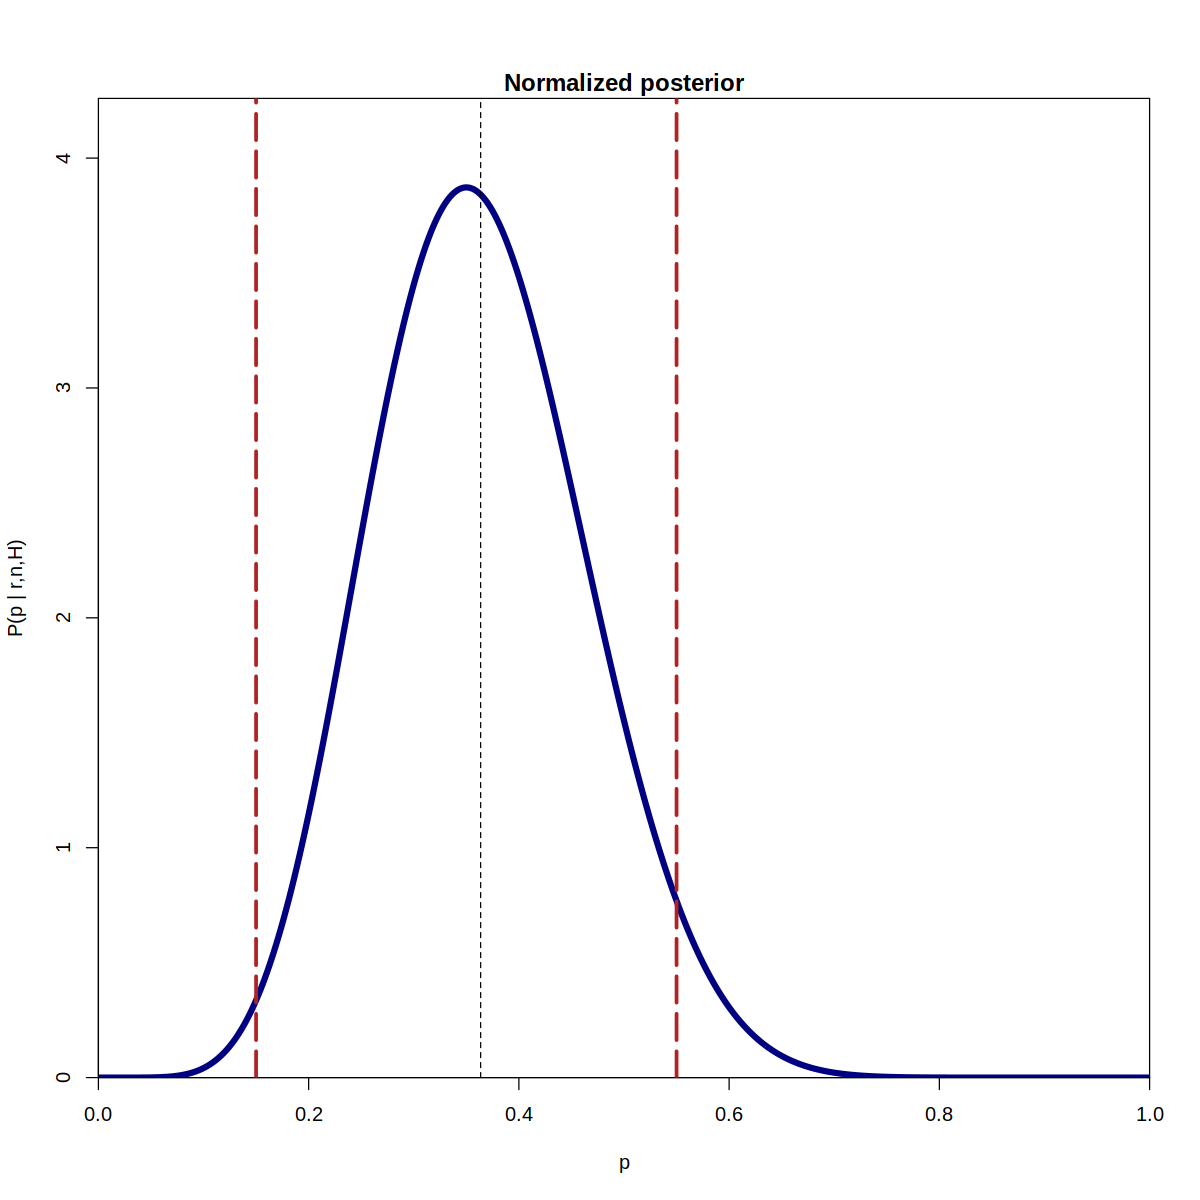

In [10]:
n <- 20; n.sample <- 2000; delta.p <- 1/n.sample
r <- 7
p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )

options(repr.plot.width=10, repr.plot.height=10)

#Normalization
p.star <- dbinom (x=r, size=n, prob=p)
pu.norm <- p.star /( delta.p*sum(p.star ))
plot(p, pu.norm , type="l", lwd=5, col='navy',
        xlim=c(0,1), ylim=c(0,1.1*max(pu.norm )),
        xaxs="i", yaxs="i", xlab="p", ylab="P(p | r,n,H)") 
     title (main=paste("Posterior with Uniform Prior"), line=0.3, cex.main=1.2)

#Mean and variance
pu.mean <- delta.p*sum(p*pu.norm)
pu.var <- delta.p*sum(p^2*pu.norm)-(pu.mean)^2
abline (v=pu.mean , lty=2)

cat('mean: ', pu.mean, '\n')
cat('variance: ', pu.var)

#Credibility interval
u.cred <- c()
u.cred[1] <- qbinom(0.025, n, r/n)/n
u.cred[2] <- qbinom(0.975, n, r/n)/n
abline(v=u.cred[1], lty=5, lwd=3, col='firebrick')
abline(v=u.cred[2], lty=5, lwd=3, col='firebrick')

### 1.2 Jeffrey prior

In the case of a Jeffrey prior, we obtain a beta distribution as posterior

mean:  0.3571429 
variance:  0.01043599

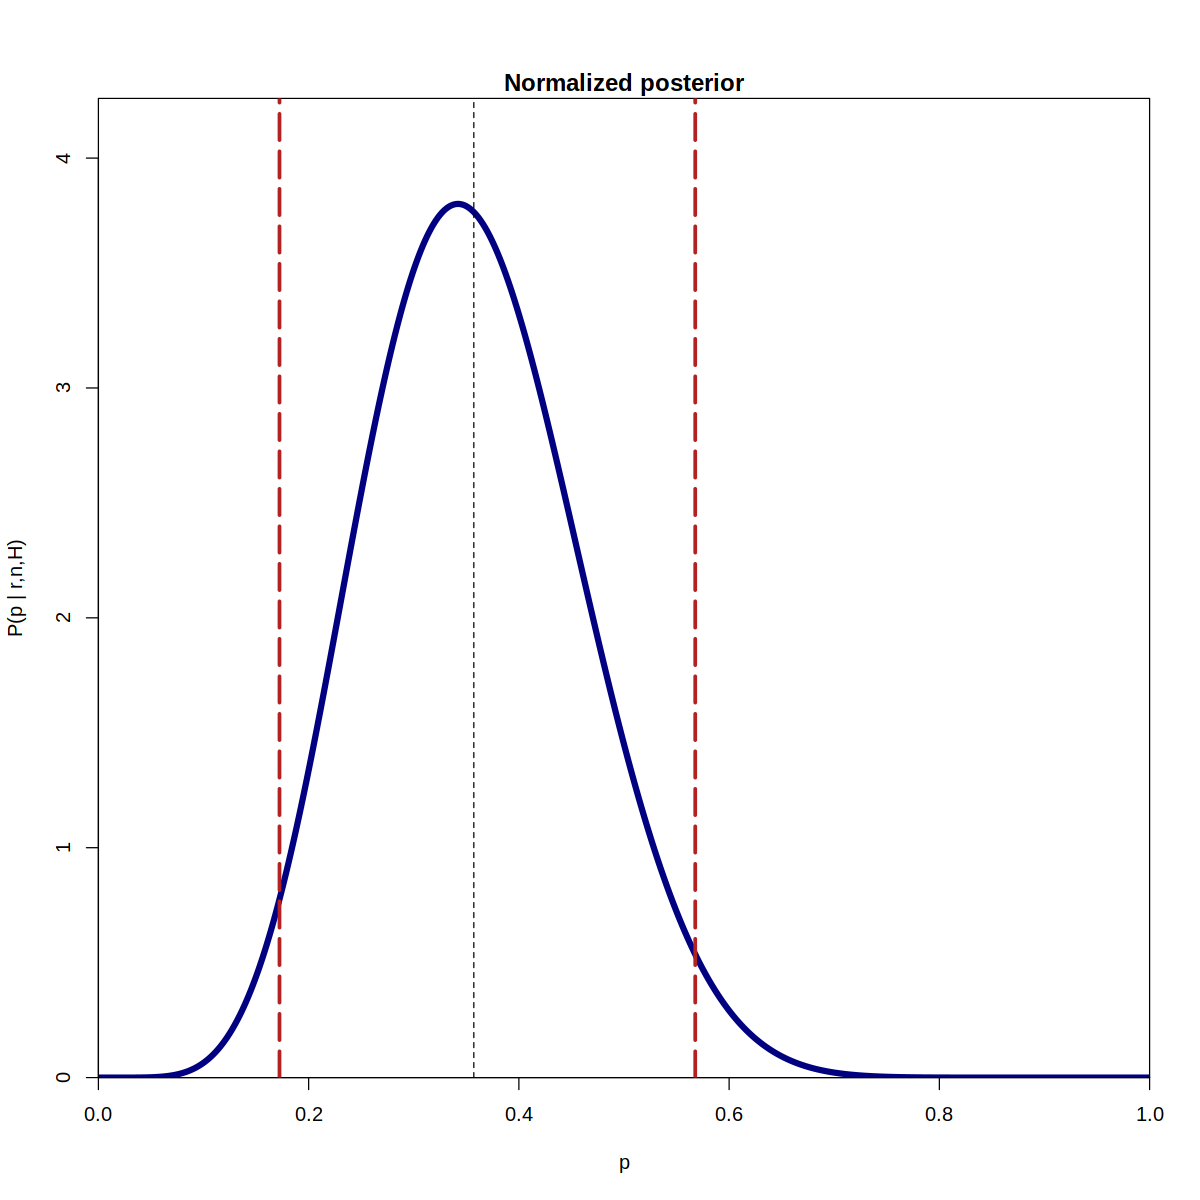

In [15]:
n <- 20; n.sample <- 2000; delta.p <- 1/n.sample
r <- 7
p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )

#parameters of prior
alpha <- 1/2
beta <- 1/2

#parameters of posterior
alpha.post <- alpha + r
beta.post <- beta + n - r

options(repr.plot.width=10, repr.plot.height=10)

#Normalization
p.star <- dbeta(p, alpha.post, beta.post)
pj.norm <- p.star /( delta.p*sum(p.star ))
plot(p, pj.norm , type="l", lwd=5, col='navy',
        xlim=c(0,1), ylim=c(0,1.1*max(pu.norm )),
        xaxs="i", yaxs="i", xlab="p", ylab="P(p | r,n,H)") 
     title (main=paste("Posterior with Jeffrey Prior"), line=0.3, cex.main=1.2)

#Mean and variance
pj.mean <- delta.p*sum(p*pj.norm)
pj.var <- delta.p*sum(p^2*pj.norm)-(pj.mean)^2
abline (v=pj.mean , lty=2)

cat('mean: ', pj.mean, '\n')
cat('variance: ', pj.var)

#Credibility interval
j.cred <- c()
j.cred[1] <- qbeta(0.025, alpha.post, beta.post)
j.cred[2] <- qbeta(0.975, alpha.post, beta.post)
abline(v=j.cred[1], lty=5, lwd=3, col='firebrick')
abline(v=j.cred[2], lty=5, lwd=3, col='firebrick')

### 1.2 Step prior

In [72]:
step <- function(p){
    if(p<=0.2){res <- p}
    if(0.2<p & p<=0.3){res<- 0.2}
    if(0.2<p & p<=0.5){res<- 0.5-p}
    if(p>0.5){res <- 0}
    return(res)
}

In [74]:
n <- 20; n.sample <- 2000; delta.p <- 1/n.sample
r <- 7
p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )

mean:  0.3068573 
variance:  0.005025795

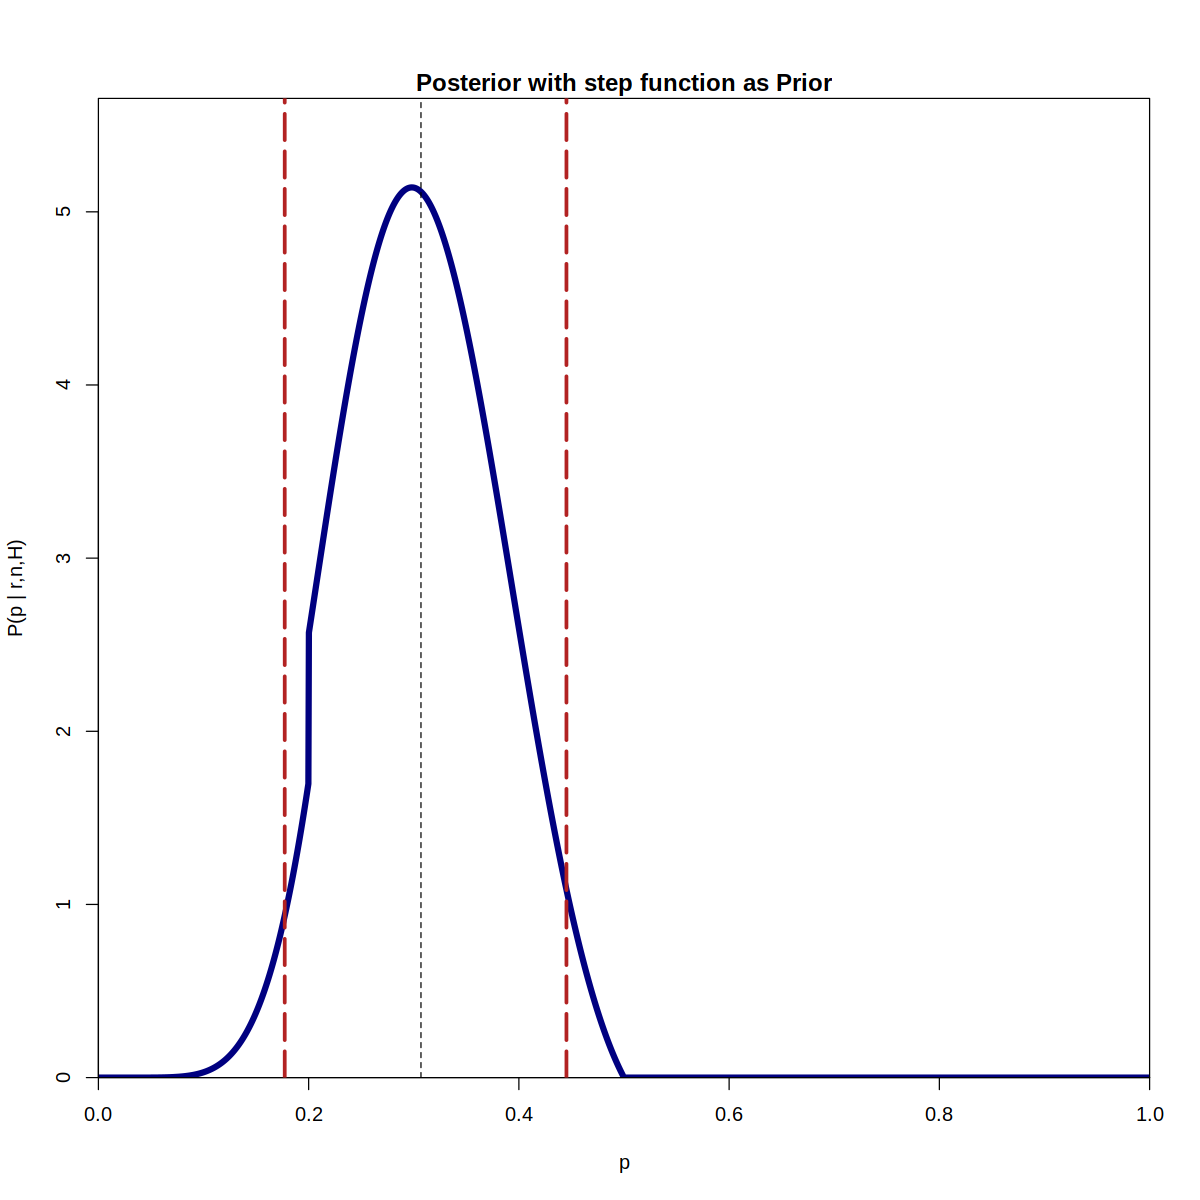

In [80]:
options(repr.plot.width=10, repr.plot.height=10)

#Step prior
p.prior <- c()
for(i in seq(1,length(p),by=1)){p.prior[i] <- step(p[i])}

#Numerical posterior eval
p.like <- dbinom(x=r, size=n, prob=p)
ps.post <- p.prior*p.like  #unnormalized posterior

#Normalization
ps.norm <- ps.post /( delta.p*sum(ps.post ))
plot(p, ps.norm , type="l", lwd=5, col='navy',
        xlim=c(0,1), ylim=c(0,1.1*max(ps.norm )),
        xaxs="i", yaxs="i", xlab="p", ylab="P(p | r,n,H)") 
     title (main=paste("Posterior with step function as Prior"), line=0.3, cex.main=1.2)

#Mean and variance
ps.mean <- delta.p*sum(p*ps.norm)
ps.var <- delta.p*sum(p^2*ps.norm)-(ps.mean)^2
abline (v=ps.mean , lty=2)

cat('mean: ', ps.mean, '\n')
cat('variance: ', ps.var)

#Credibility interval
cum_step <- cumsum(ps.norm)/sum(ps.norm)
s.cred[1] <-  min(p[cum_step>=0.025])
s.cred[2] <-  max(p[cum_step<=0.975])
abline(v=s.cred[1], lty=5, lwd=3, col='firebrick')
abline(v=s.cred[2], lty=5, lwd=3, col='firebrick')

In [82]:
data = data.frame(Prior=c("Uniform", "Beta(0.5,0.5)", "Step function"), 
                  Posterior=c("Binomial", "Beta(7.5,13.5)", "Numerical"), 
                  Mean=c(format(round(pu.mean, 3), nsmall = 3),format(round(pj.mean, 3), nsmall = 3),format(round(ps.mean, 3), nsmall = 3)),
                  Variance=c(format(round(pu.var, 3), nsmall = 3),format(round(pj.var, 3), nsmall = 3),format(round(ps.var, 3), nsmall = 3)),
                  "95%Cred.Int."=c(paste(format(round(u.cred[1], 3), nsmall = 3),'-',format(round(u.cred[2], 3), nsmall = 3)),
                                   paste(format(round(j.cred[1], 3), nsmall = 3),'-',format(round(j.cred[2], 3), nsmall = 3)),
                                   paste(format(round(s.cred[1], 3), nsmall = 3),'-',format(round(s.cred[2], 3), nsmall = 3))),check.names=FALSE)

In [83]:
data

Prior,Posterior,Mean,Variance,95%Cred.Int.
<chr>,<chr>,<chr>,<chr>,<chr>
Uniform,Binomial,0.364,0.010,0.150 - 0.550
"Beta(0.5,0.5)","Beta(7.5,13.5)",0.357,0.010,0.172 - 0.568
Step function,Numerical,0.307,0.005,0.177 - 0.445


# Exercise 2
- Giardia cysts[1] is a parassite that can contaminate food, water, and surfaces, and they can cause giardiasis when swallowed in this infective stage of their life cycle.    
Infection occurs when a person swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects.
- a group of researchers, working for a Human Health Department, work for determining the quality of stream water
- they take n = 116 samples of one-liter water from sites identified to have a heavy environmental impact from birds and waterflow.
- out of these samples, y = 17 samples contained Giard cystis

1. Assuming π as the probability that one-liter water sample contains Giardia cystis, find the posterior distribution for π:
- assuming a uniform prior distribution
- assuming a Beta (1, 4) prior

2. Plot the posterior distribution and summerize the results computing the first two moments

3. Find a normal approximation for the posterior g(π|y)
4. compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table
5. add the limits on the plot of the posterior distributions

In [69]:
n <- 116
y <- 17

In [70]:
n.sample <- 2000

In [71]:
# UNIFORM PRIOR
p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )
delta.p <- 1/n.sample

#Normalization
p.star <- dbinom (x=y, size=n, prob=p)
pu.norm <- p.star /( delta.p*sum(p.star ))

pu.mean <- delta.p*sum(pu.norm*p)
pu.var <- delta.p*sum(pu.norm*p**2)-(pu.mean)**2

In [72]:
# BETA PRIOR
p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )
delta.p <- 1/n.sample

#prior parameters
alpha <- 1
beta <- 4

# posterior (ALREADY NORMALIZED!)
alphap <- y+alpha
betap <- n-y+beta

pb.norm <- dbeta(p,alphap,betap)
pb.mean <- delta.p *sum(pb.norm*p)
pb.var <- delta.p*sum(pb.norm*p**2)-(pb.mean)**2

In [23]:
#CREDIBILITY INTERVALS

#1. Uniform prior
cum_unif <- cumsum(pu.norm)/sum(pu.norm)
u.cred <- c()
u.cred[1] <- max(p[cum_unif<=0.025])
u.cred[2] <- min(p[cum_unif>=0.975])

#2. Beta prior
cum_beta <- cumsum(pb.norm)/sum(pb.norm)
b.cred <- c()
b.cred[1] <- max(p[cum_beta<=0.025])
b.cred[2] <- min(p[cum_beta>=0.975])

#### Plots

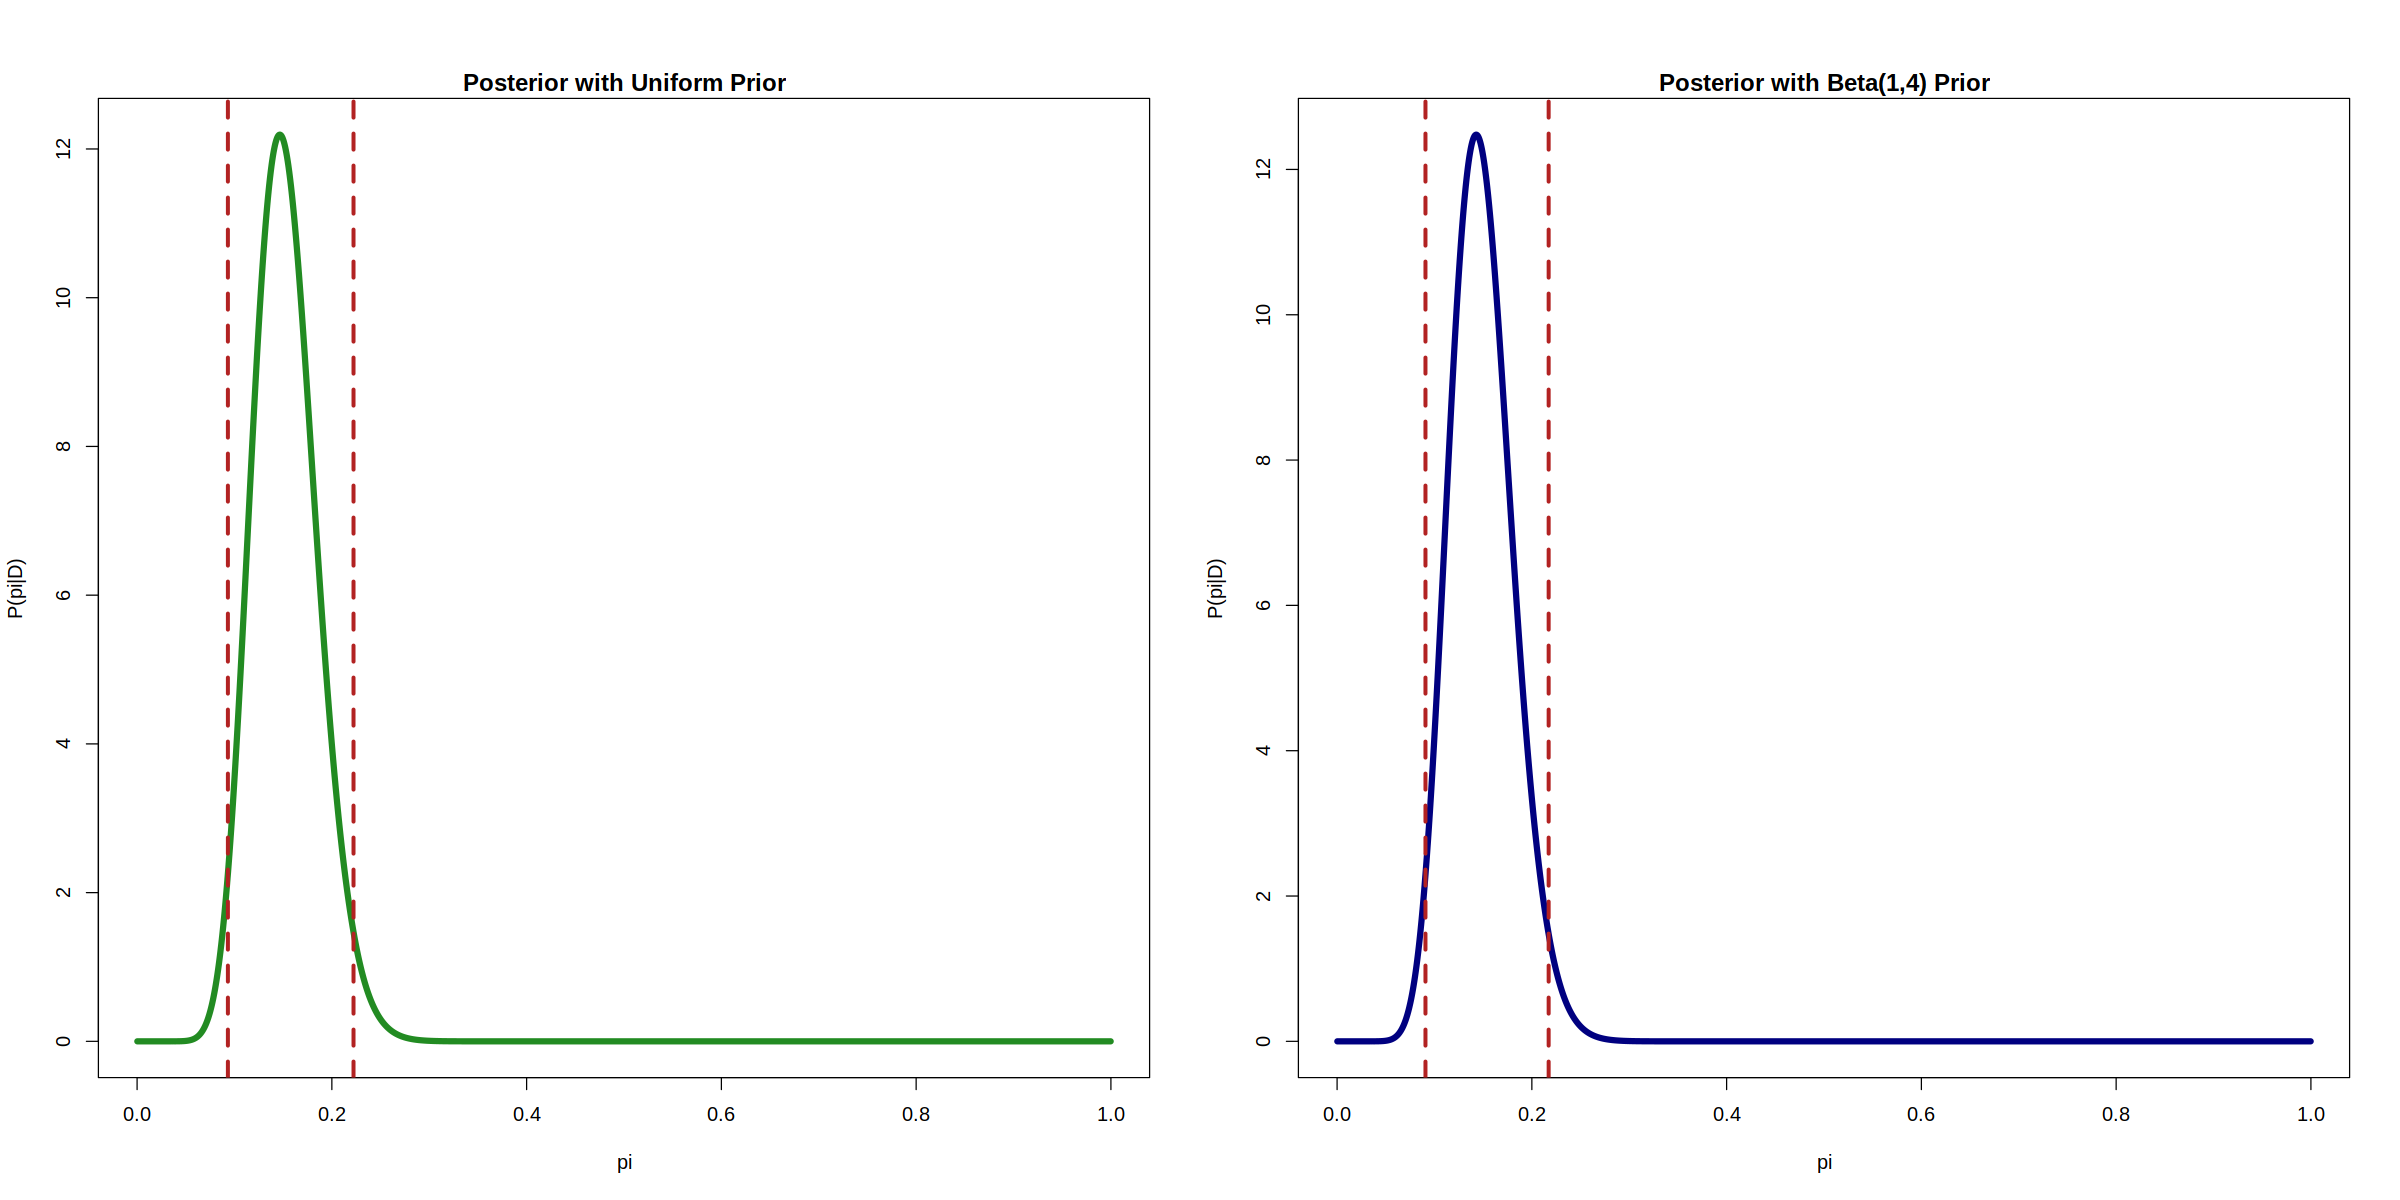

In [24]:
# Uniform prior with binomial likelihood = binomial posterior
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,2))

plot(p,pu.norm,type='l', lwd=5, col='forestgreen', xlab='pi', ylab='P(pi|D)')
title (main=paste("Posterior with Uniform Prior"), line=0.3, cex.main=1.2)
abline(v=u.cred[1], lty=2, col='firebrick',lwd=3.2)
abline(v=u.cred[2], lty=2, col='firebrick',lwd=3.2)

plot(p, pb.norm, type='l', lwd=5, col='navy',xlab='pi', ylab='P(pi|D)')
title (main=paste("Posterior with Beta(1,4) Prior"), line=0.3, cex.main=1.2)
abline(v=b.cred[1], lty=2, col='firebrick',lwd=3.2)
abline(v=b.cred[2], lty=2, col='firebrick',lwd=3.2)

In [29]:
meanvar <- data.frame(Prior=c('Uniform','Beta(1,4)'),
                     Mean=c(pu.mean, pb.mean),
                     Variance=c(pu.var,pb.var))

In [30]:
meanvar

Prior,Mean,Variance
<chr>,<dbl>,<dbl>
Uniform,0.1525424,0.001086329
"Beta(1,4)",0.1487603,0.001037957


#### Gaussian approximations

In [44]:
# Gaussian approximation of first posterior(binomial)
theta.u <- y/n                       #best estimate
sigma.u <- (((y*(n-y))/n)**0.5)/n    #reliability

pu.gauss <- dnorm(p, mean=theta.u, sd=sigma.u)

# Gaussian approximation of second posterior(beta)
theta.b <- (y+alphap-1)/(n+alphap+betap-2)                           #best estimate
sigma.b <- (((alphap + y -1)/(alphap+y))**0.5)/(alphap+betap+n-2)    #reliability

pb.gauss <- dnorm(p, mean=theta.b, sd=sigma.b)

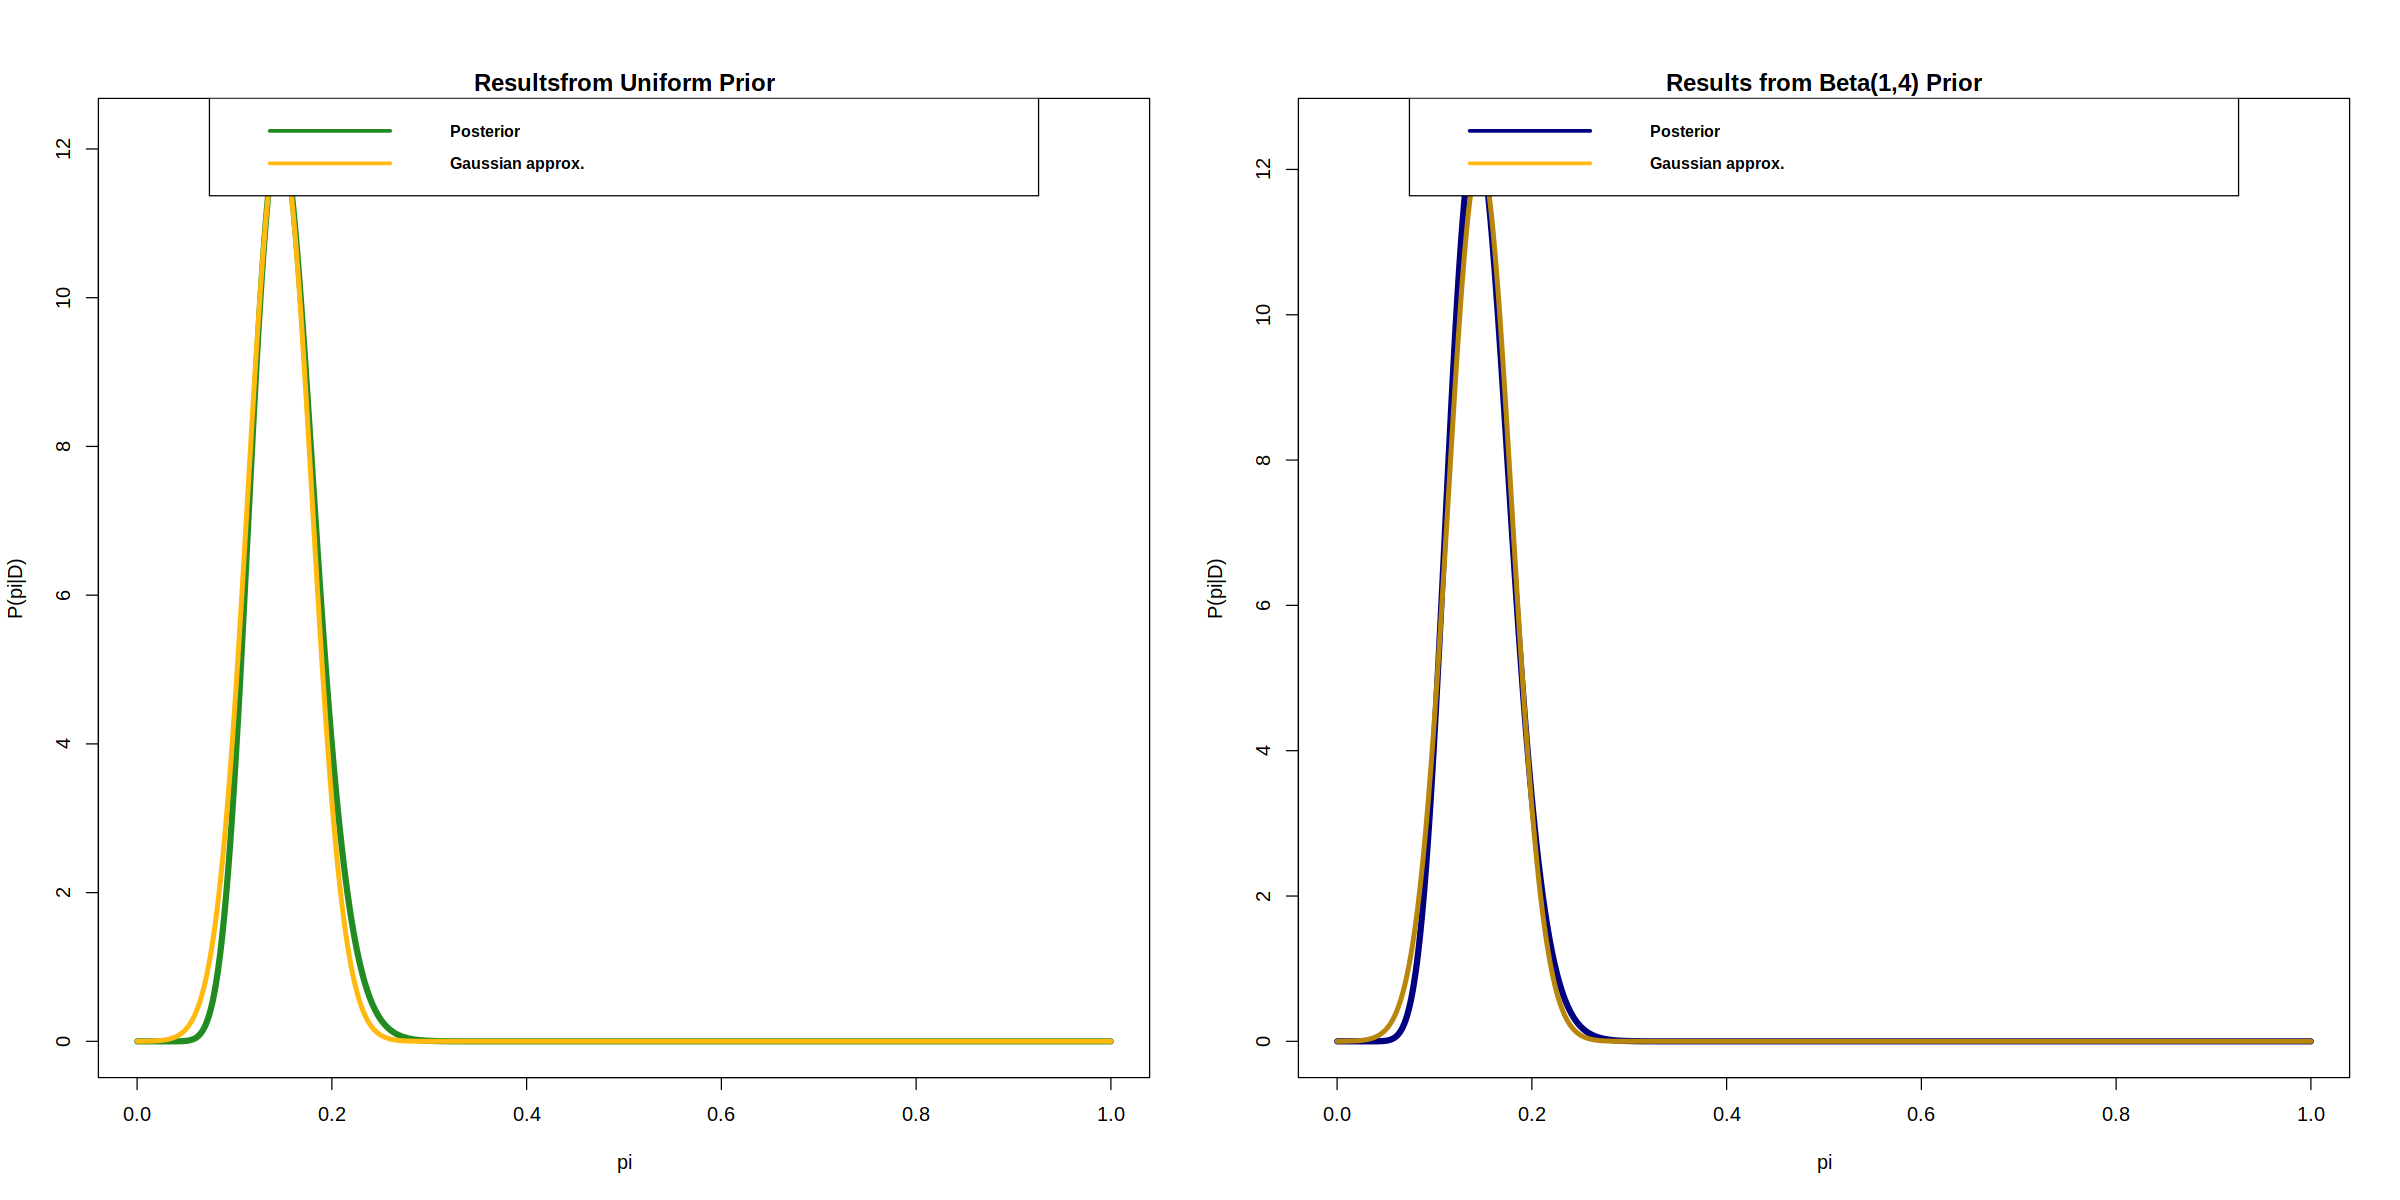

In [47]:
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,2))

plot(p,pu.norm,type='l', lwd=5, col='forestgreen', xlab='pi', ylab='P(pi|D)')
lines(p,pu.gauss,type='l', lwd=4, col='darkgoldenrod1')
title (main=paste("Resultsfrom Uniform Prior"), line=0.3, cex.main=1.2)
legend("top", c("Posterior","Gaussian approx."), col=c('forestgreen','darkgoldenrod1'), cex=.8, lty=1,lwd=3,text.font = 2)

plot(p, pb.norm, type='l', lwd=5, col='navy',xlab='pi', ylab='P(pi|D)')
lines(p,pu.gauss,type='l', lwd=4, col='darkgoldenrod')
title (main=paste("Results from Beta(1,4) Prior"), line=0.3, cex.main=1.2)
legend("top", c("Posterior","Gaussian approx."), col=c('navy','darkgoldenrod1'), cex=.8, lty=1,lwd=3,text.font = 2)


In [48]:
#CREDIBILITY INTERVALS

#1. Binomial posterior approximation
ugaus.cred <- c()
ugaus.cred[1] <- qnorm(0.025, mean=theta.u, sd=sigma.u)
ugaus.cred[2] <- qnorm(0.975, mean=theta.u, sd=sigma.u)

#2. Beta posterior approximation
bgaus.cred <- c()
bgaus.cred[1] <- qnorm(0.025, mean=theta.b, sd=sigma.b)
bgaus.cred[2] <- qnorm(0.975, mean=theta.b, sd=sigma.b)

In [56]:
credibilities <- data.frame(Prior=c('Uniform','Beta(1,4)'),
                            Posterior=c('Binomial','Beta'),
                            "Best.estimate"=c(theta.u,theta.b),
                            "95%Cred.Int."=c(paste(format(round(u.cred[1], 3), nsmall = 3),'-',format(round(u.cred[2], 3), nsmall = 3)),paste(format(round(b.cred[1], 3), nsmall = 3),'-',format(round(b.cred[2], 3), nsmall = 3))),
                            "Gauss.95%Int."=c(paste(format(round(ugaus.cred[1], 3), nsmall = 3),'-',format(round(ugaus.cred[2], 3), nsmall = 3)),paste(format(round(bgaus.cred[1], 3), nsmall = 3),'-',format(round(bgaus.cred[2], 3), nsmall = 3)))
                           )

In [57]:
credibilities

Prior,Posterior,Best.estimate,X95.Cred.Int.,Gauss.95.Int.
<chr>,<chr>,<dbl>,<chr>,<chr>
Uniform,Binomial,0.1465517,0.093 - 0.222,0.082 - 0.211
"Beta(1,4)",Beta,0.1446809,0.091 - 0.217,0.136 - 0.153


# Exercise 3
A coin is flipped n = 30 times with the following outcomes:    

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H
1. Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.
2. Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.
3. Repeat the same analysis assuming a sequential analysis of the data 1. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).
4.  Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

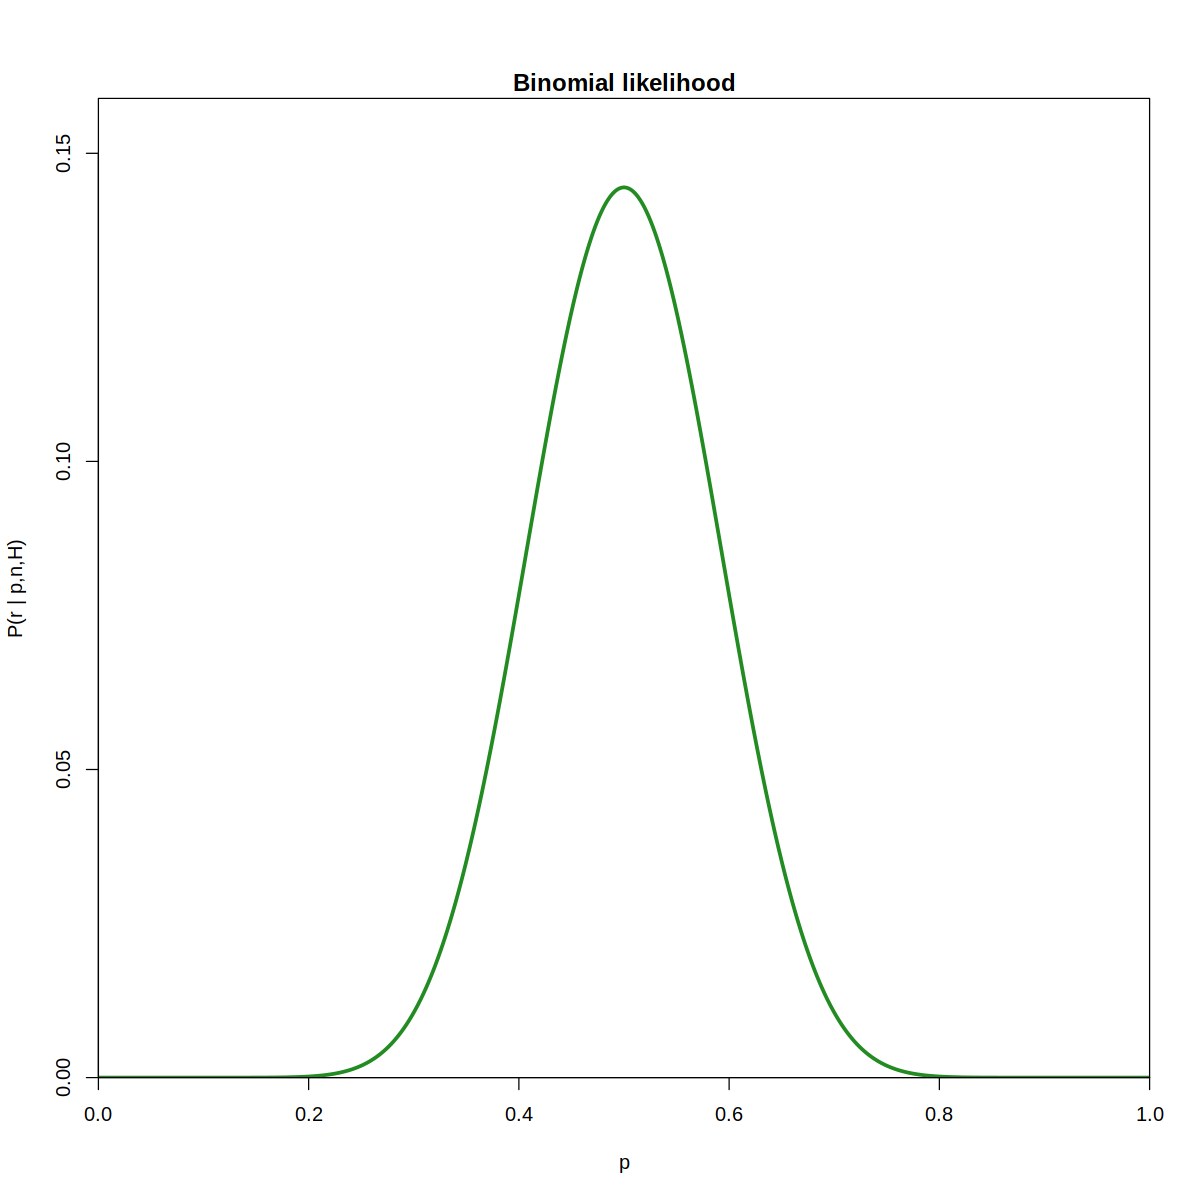

In [74]:
#assume we want to find the pdf of the probability of having head.
n <- 30
r <- 15 #number of heads

n.sample <- 2000
delta.p <- 1/n.sample

#LIKELIHOOD (same in all cases)
options(repr.plot.height=10, repr.plot.width=10)

p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )
p.like <- dbinom(x=r, size=n, prob=p)
plot(p, p.like , type="l", lwd=3, col='forestgreen',
        xlim=c(0,1), ylim=c(0,1.1*max(p.like )),
        xaxs="i", yaxs="i", xlab="p", ylab="P(r | p,n,H)")
title(main=paste("Binomial likelihood"), line=0.3, cex.main=1.2)


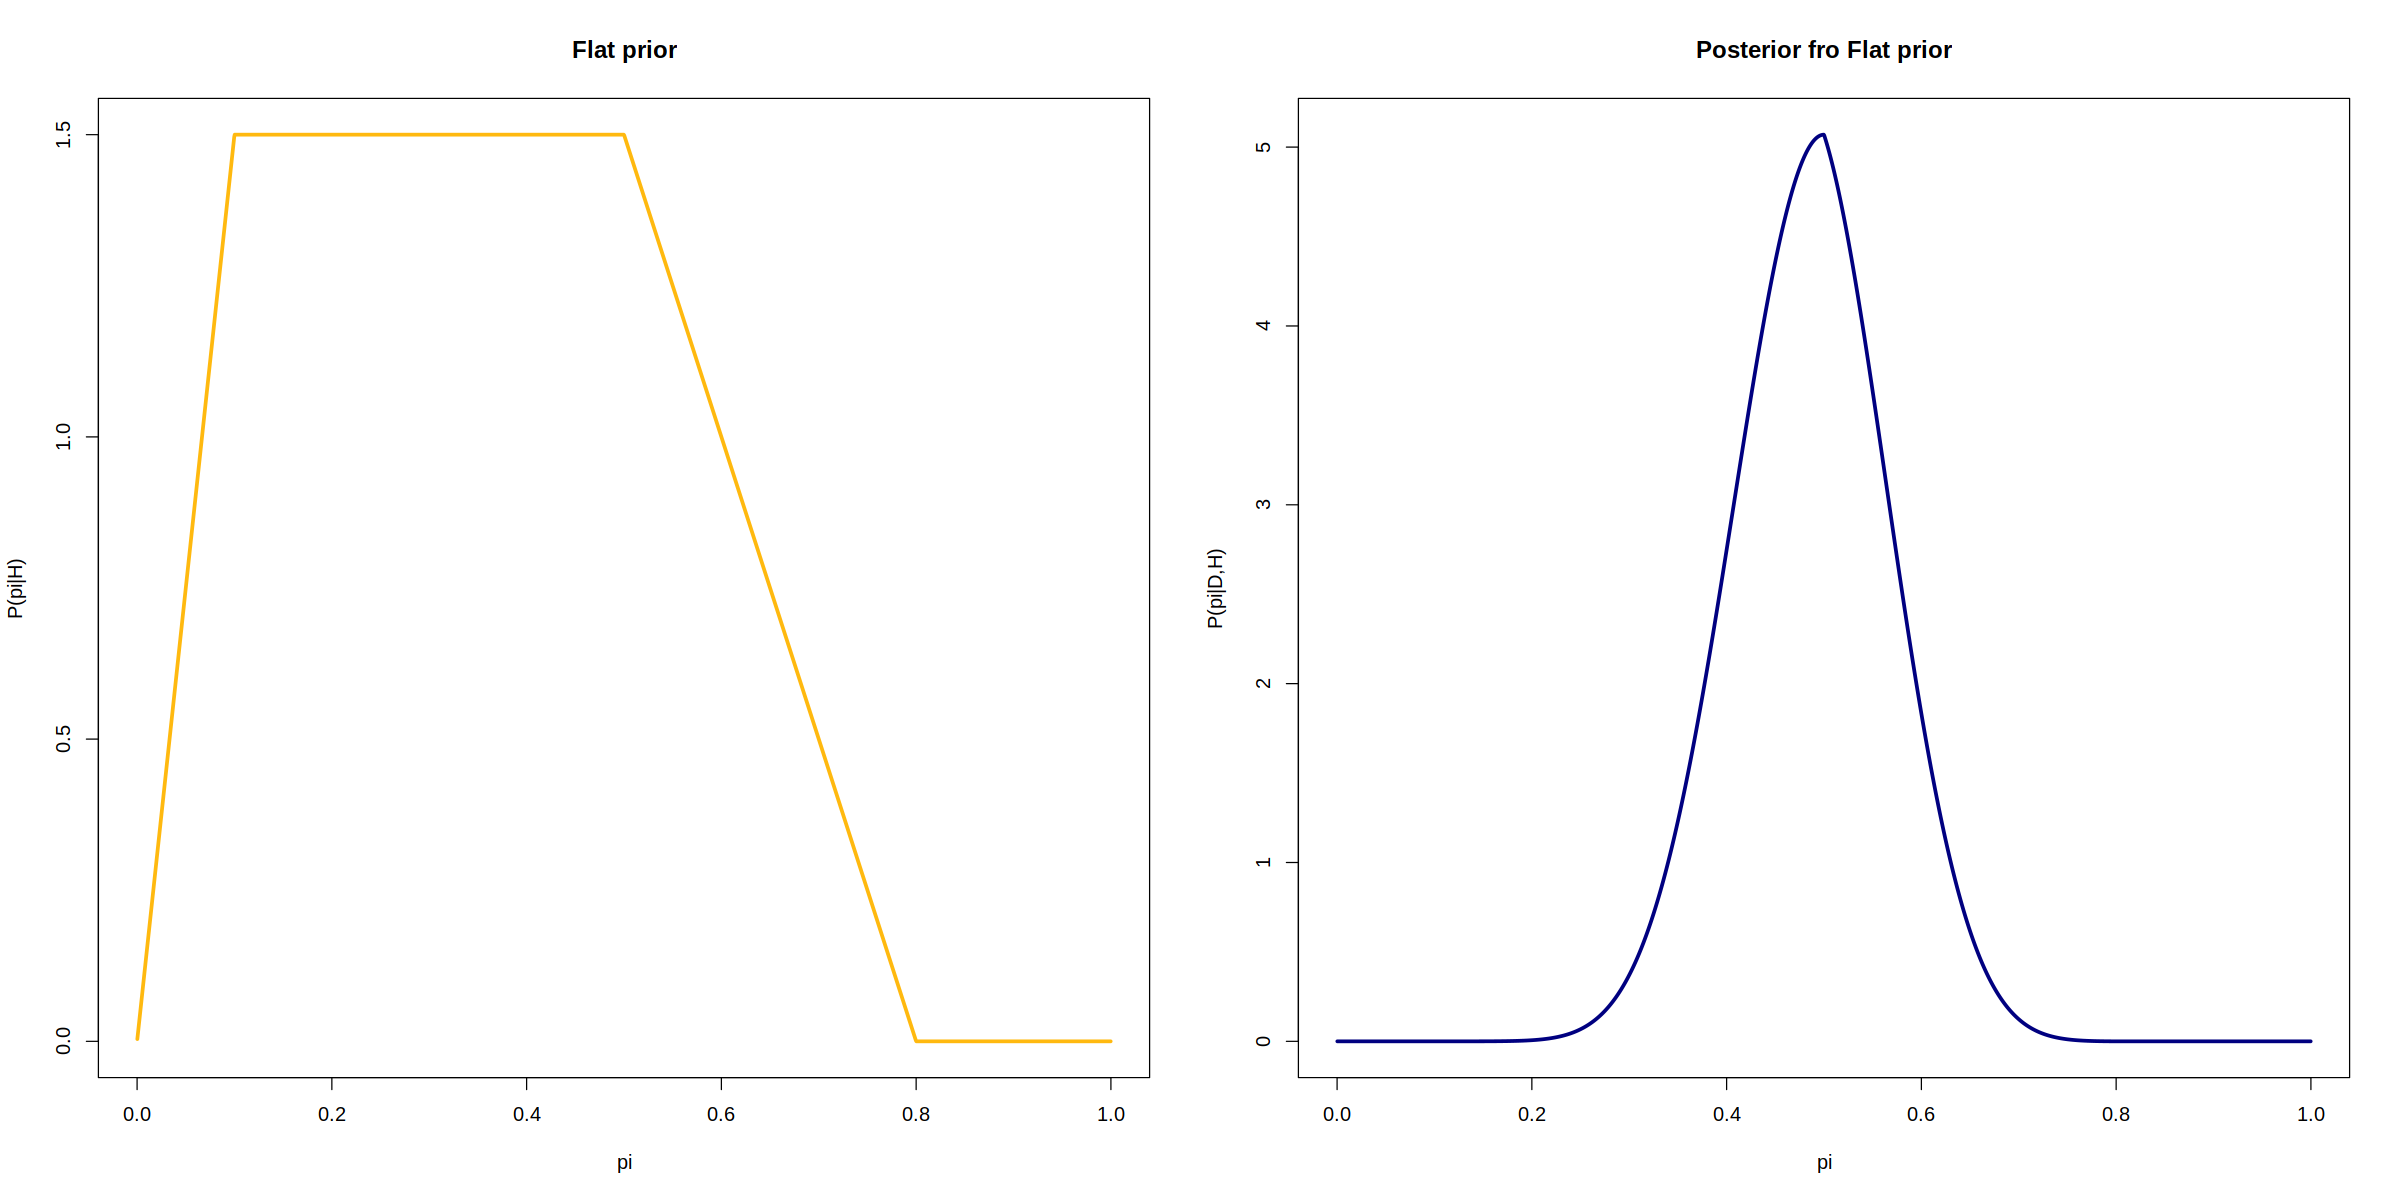

In [75]:
# 1. FLAT PRIOR

flat.prior <- function(x) {
    if (x>=0.1 & x<=0.5) {res <-1.5}
    else {if (x<0.1) {res <- 15*x}
          else {if (x>0.5 & x<=0.8) {res <- (-5)*x+4}
                else {res <- 0}}
         }
    return (res)
    }

# Evaluate prior
f.prior <- c()
for(i in seq(1,n.sample,by=1)){
    f.prior[i] <- flat.prior(p[i])
}


#Evaluate posterior and normalize
p.star <- f.prior*p.like
pf.norm <- p.star/(delta.p*sum(p.star))

par(mfrow=c(1,2))
options(repr.plot.height=10, repr.plot.width=20)

plot(p, f.prior, type='l', lwd=3, lty=1, col='darkgoldenrod1', xlab='pi', ylab='P(pi|H)')
title(main=paste('Flat prior'))

plot(p, pf.norm, type='l', lwd=3, lty=1, col='navy', xlab='pi', ylab='P(pi|D,H)')
title(main=paste('Posterior fro Flat prior'))

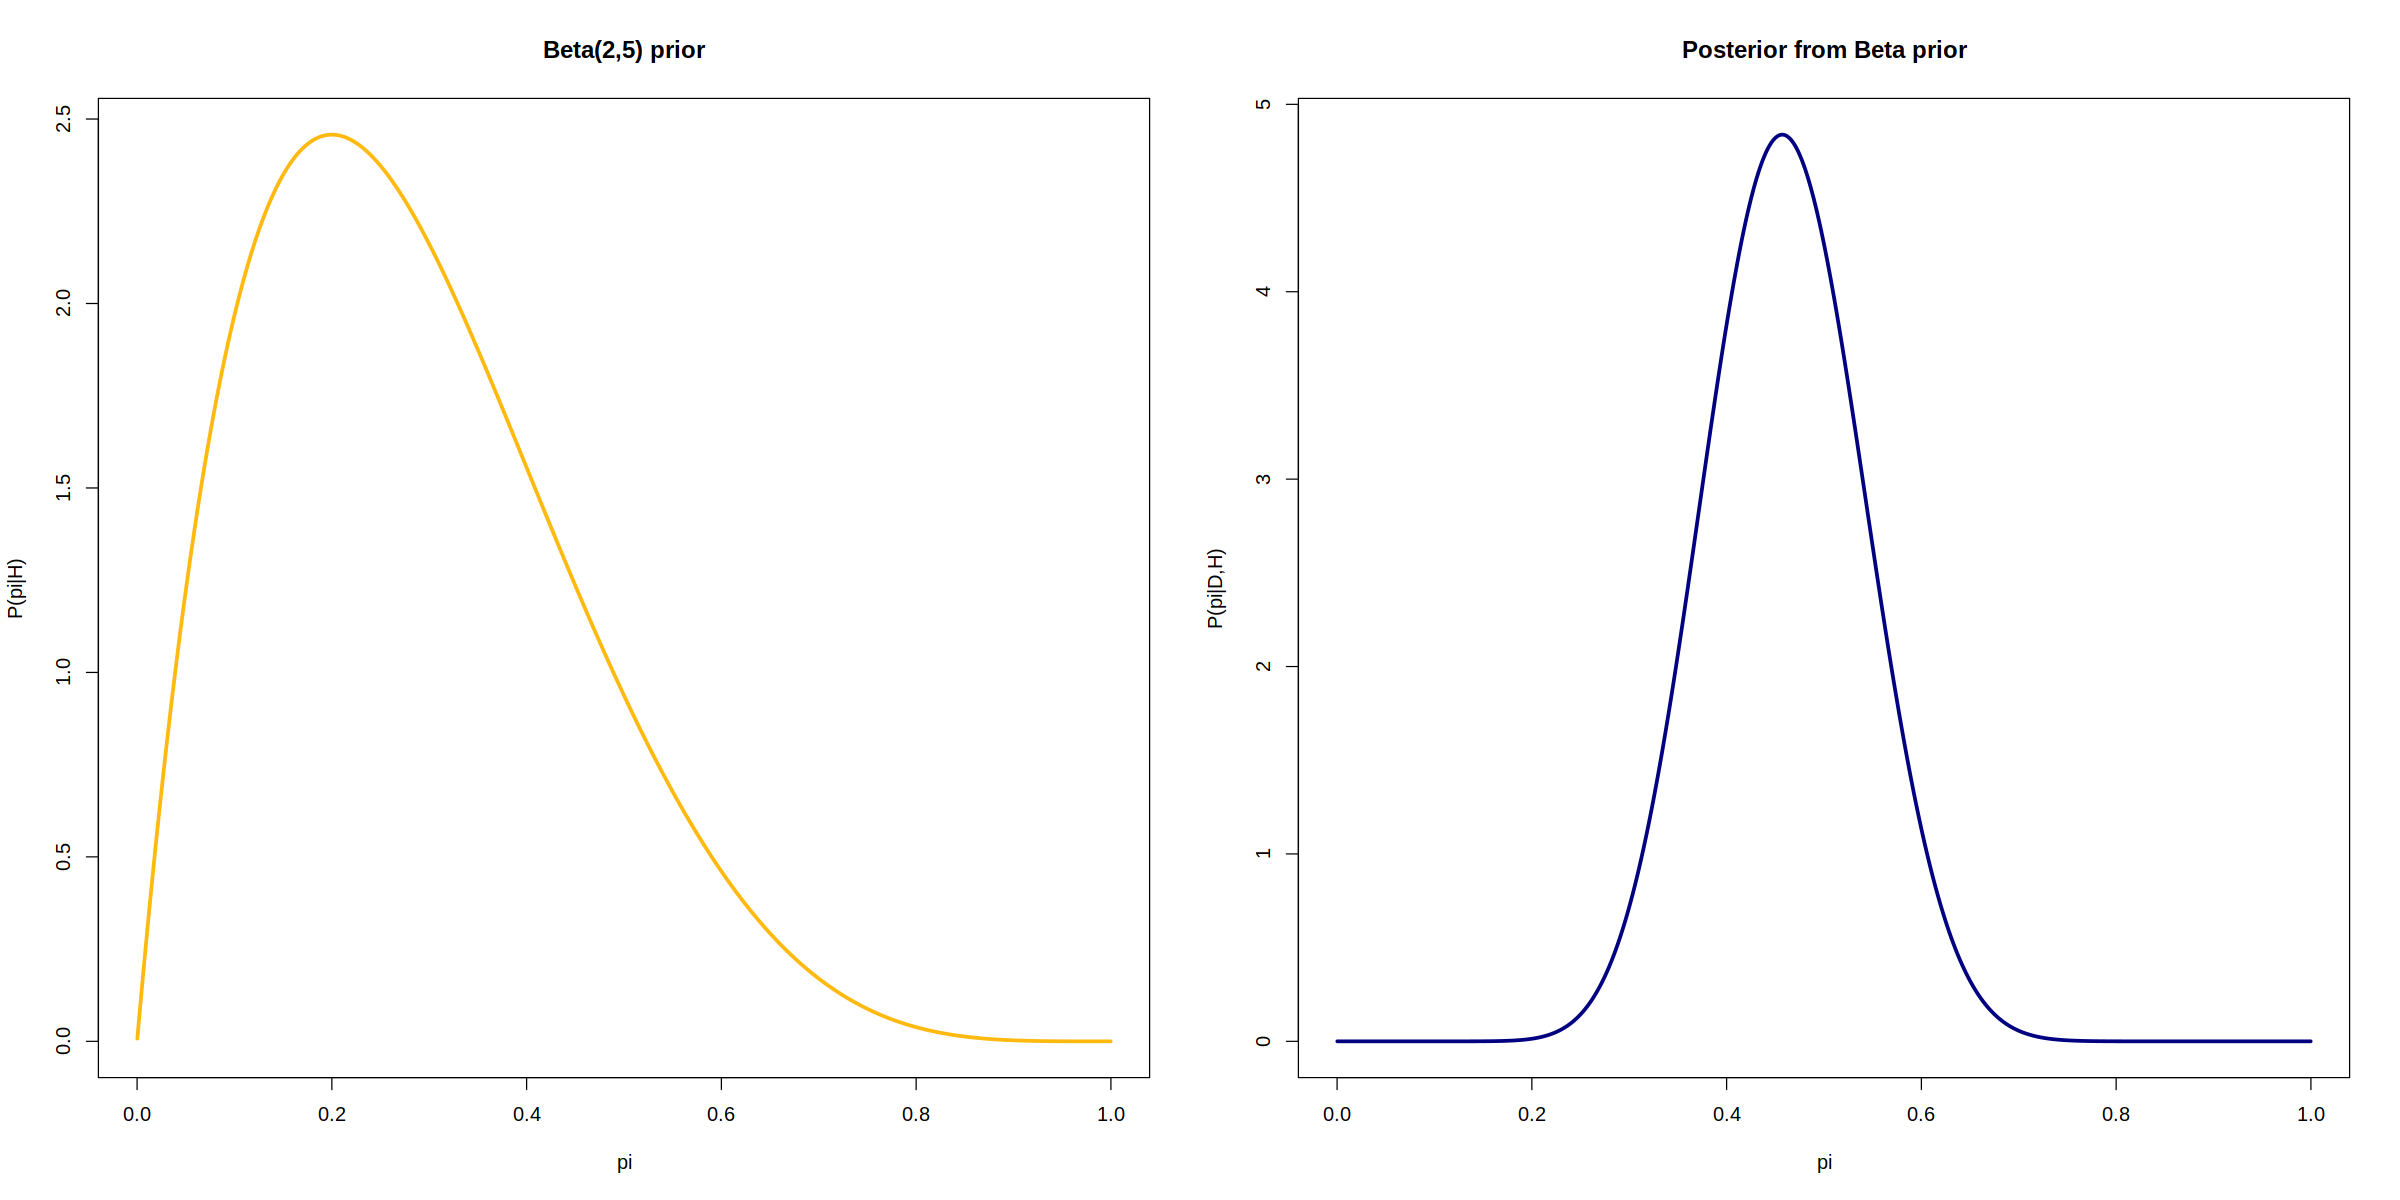

In [76]:
# 2. BETA PRIOR
alpha <- 2 
beta <- 5

#prior
b.prior <- dbeta(p, alpha, beta)


#Posterior (ALREADY NORMALIZED!)
alphap <- alpha +r
betap <- n-r + beta
b.norm <- dbeta(p, alphap, betap)

par(mfrow=c(1,2))
options(repr.plot.height=10, repr.plot.width=20)

plot(p, b.prior, type='l', lwd=3, lty=1, col='darkgoldenrod1', xlab='pi', ylab='P(pi|H)')
title(main=paste('Beta(2,5) prior'))

plot(p, b.norm, type='l', lwd=3, lty=1, col='navy', xlab='pi', ylab='P(pi|D,H)')
title(main=paste('Posterior from Beta prior'))

### Evaluating best estimates and credibility intervals

In [90]:
# Flat prior: we don't have a form for the best estimate, we search directly for the argmax of the posterior
theta.f <- p[which(pf.norm==max(pf.norm))]

cred_flat <- cumsum(pf.norm)/sum(pf.norm)
f.cred <- c()
f.cred[1] <- max(p[cred_flat<=0.025])
f.cred[2] <- min(p[cred_flat>=0.975])

# Beta prior
theta.b <- (r+alphap-1)/(n+alphap+betap-2)  
cred_beta <- cumsum(b.norm)/sum(b.norm)
b.cred <- c()
b.cred[1] <- max(p[cred_beta<=0.025])
b.cred[2] <- min(p[cred_beta>=0.975])

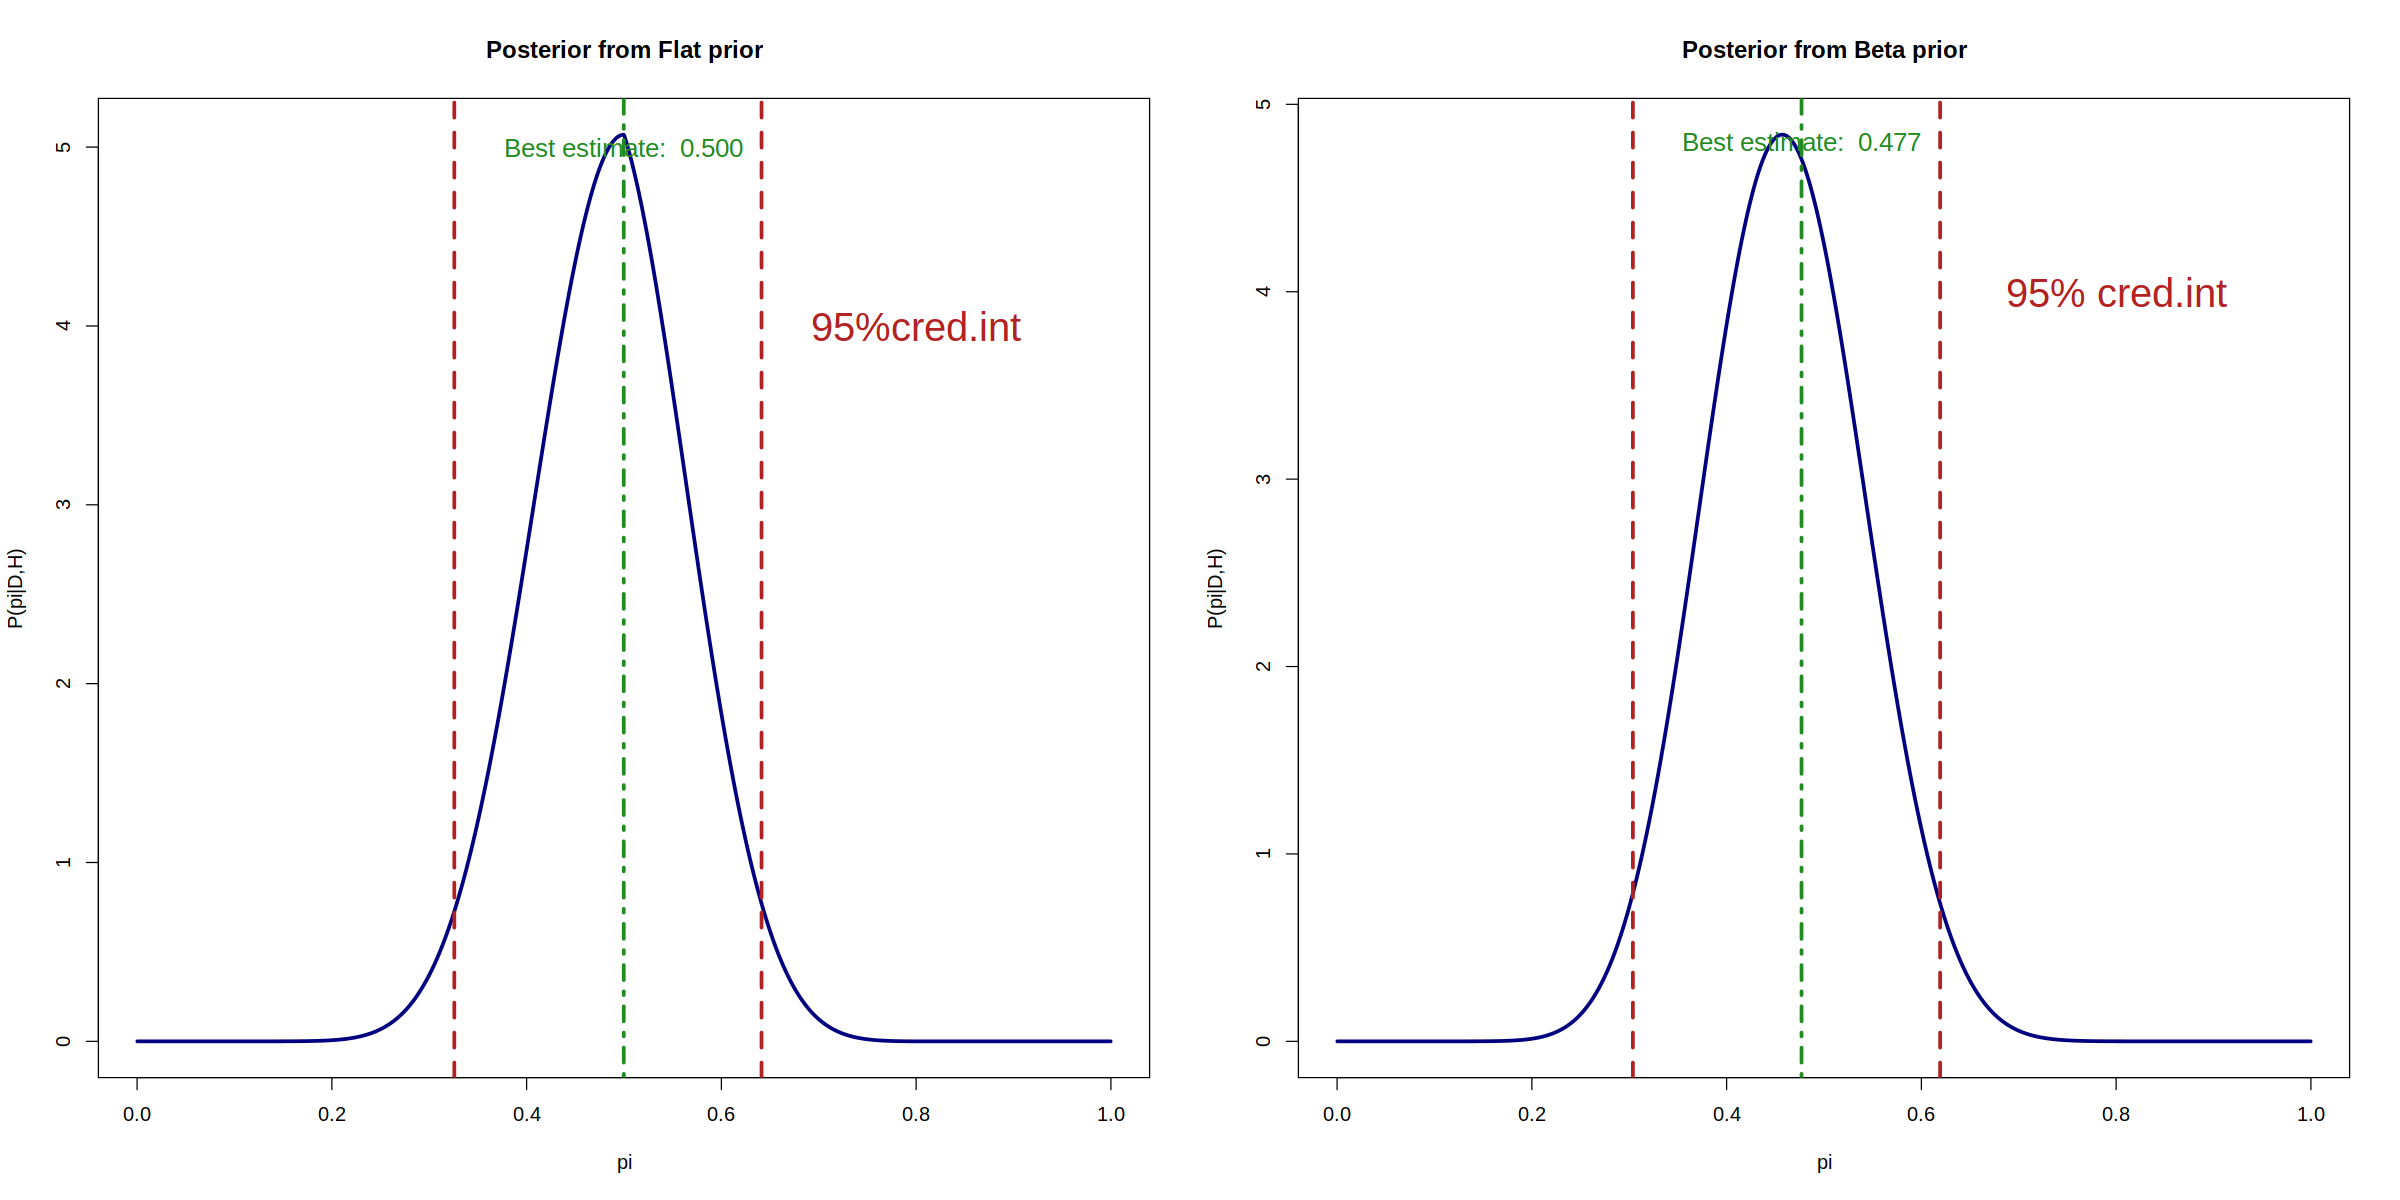

In [107]:
par(mfrow=c(1,2))

plot(p, pf.norm, type='l', lwd=3, lty=1, col='navy', xlab='pi', ylab='P(pi|D,H)')
title(main=paste('Posterior from Flat prior'))
abline(v=f.cred[1],lty=2,lwd=3,col='firebrick')
abline(v=f.cred[2],lty=2,lwd=3,col='firebrick')
abline(v=theta.f,lty=4,lwd=3,col='forestgreen')
text(0.8,4, paste('95%cred.int'),col='firebrick', cex=2)
text(theta.f,5, paste('Best estimate: ', format(round(theta.f,3),nsmall=3)),col='forestgreen', cex=1.3)

plot(p, b.norm, type='l', lwd=3, lty=1, col='navy', xlab='pi', ylab='P(pi|D,H)')
title(main=paste('Posterior from Beta prior'))
abline(v=b.cred[1],lty=2,lwd=3,col='firebrick')
abline(v=b.cred[2],lty=2,lwd=3,col='firebrick')
abline(v=theta.b,lty=4,lwd=3,col='forestgreen')
text(0.8,4, paste('95% cred.int'),col='firebrick', cex=2)
text(theta.b,4.8, paste('Best estimate: ', format(round(theta.b,3),nsmall=3)),col='forestgreen', cex=1.3)

### Sequential analysis
We do it only with the beta prior, it's the same procedure

In [114]:
n.tot <- 30
r.seq <- c(0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1)

#Prior parameters
alpha <- 2
beta <- 5

n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample ), by=1/n.sample , length.out=n.sample )

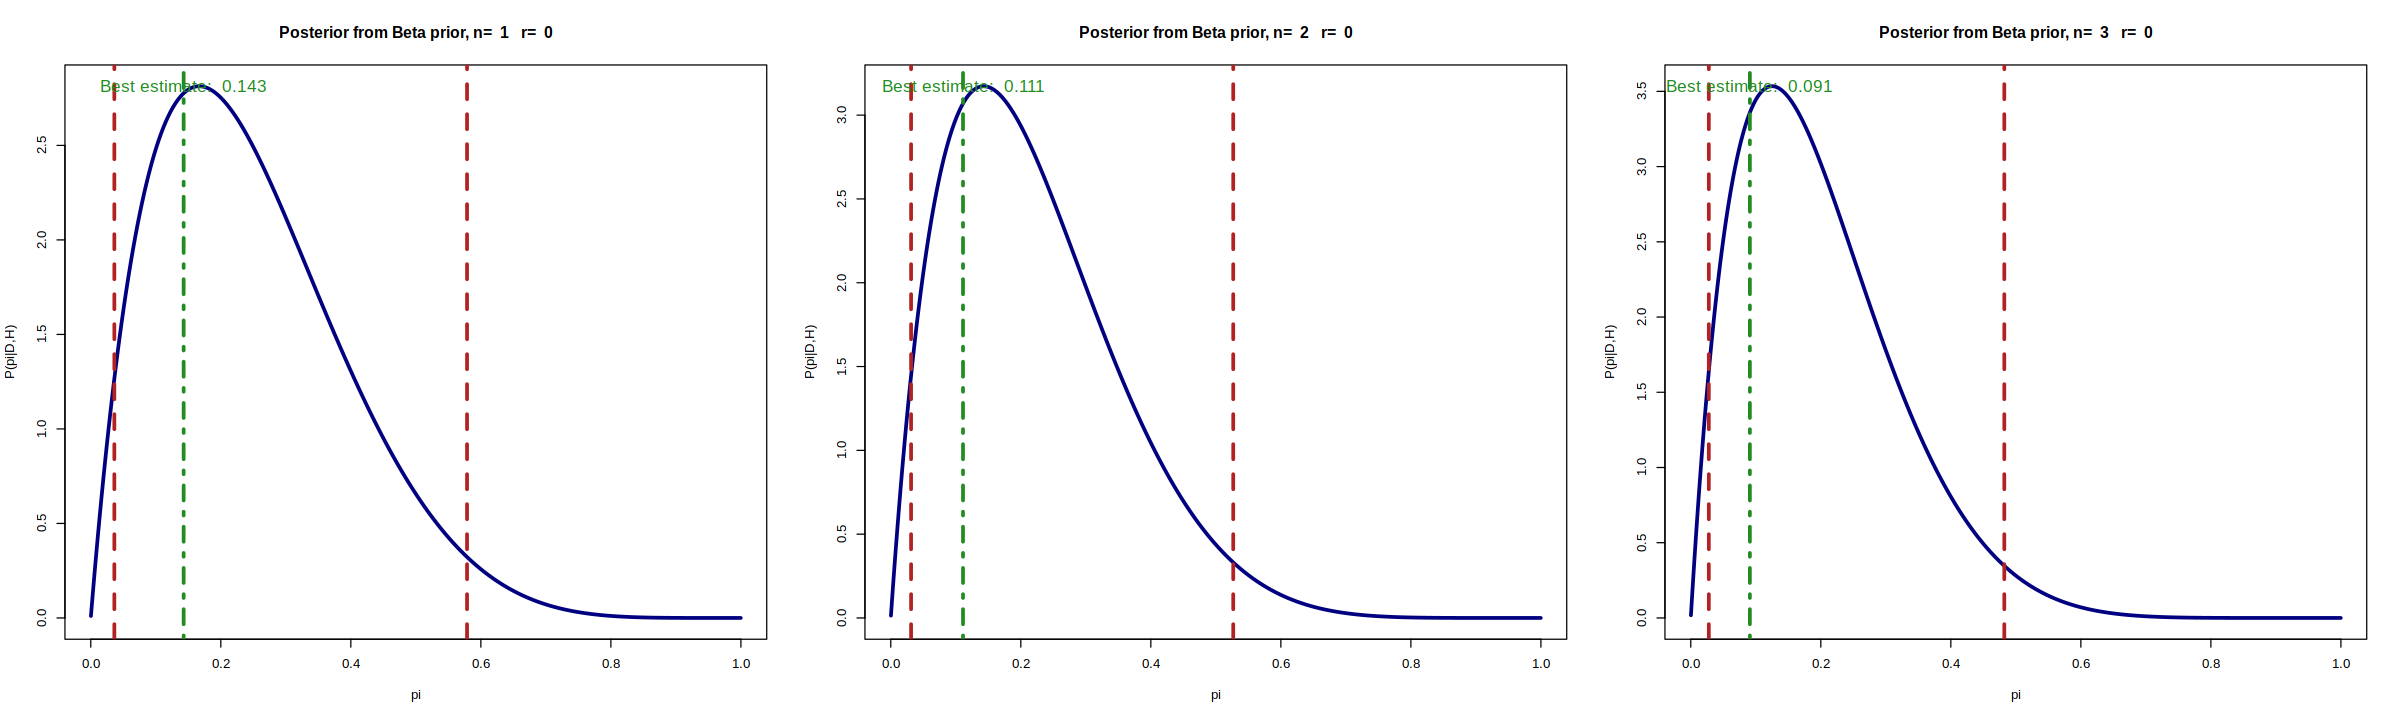

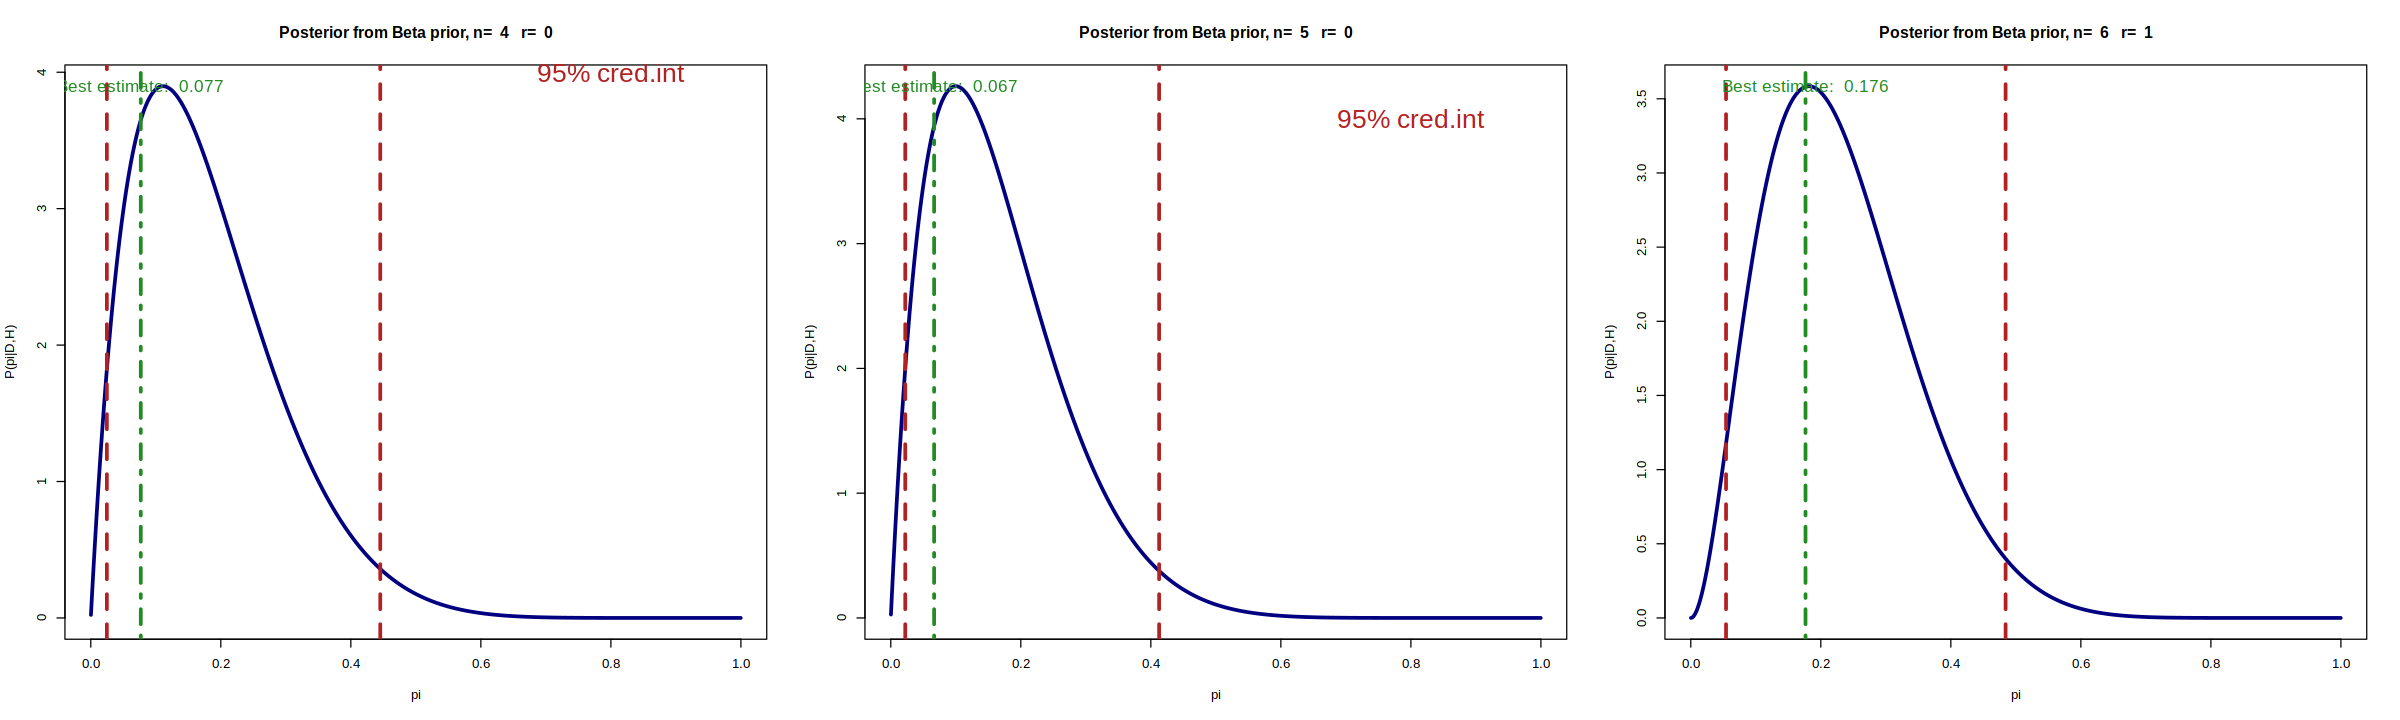

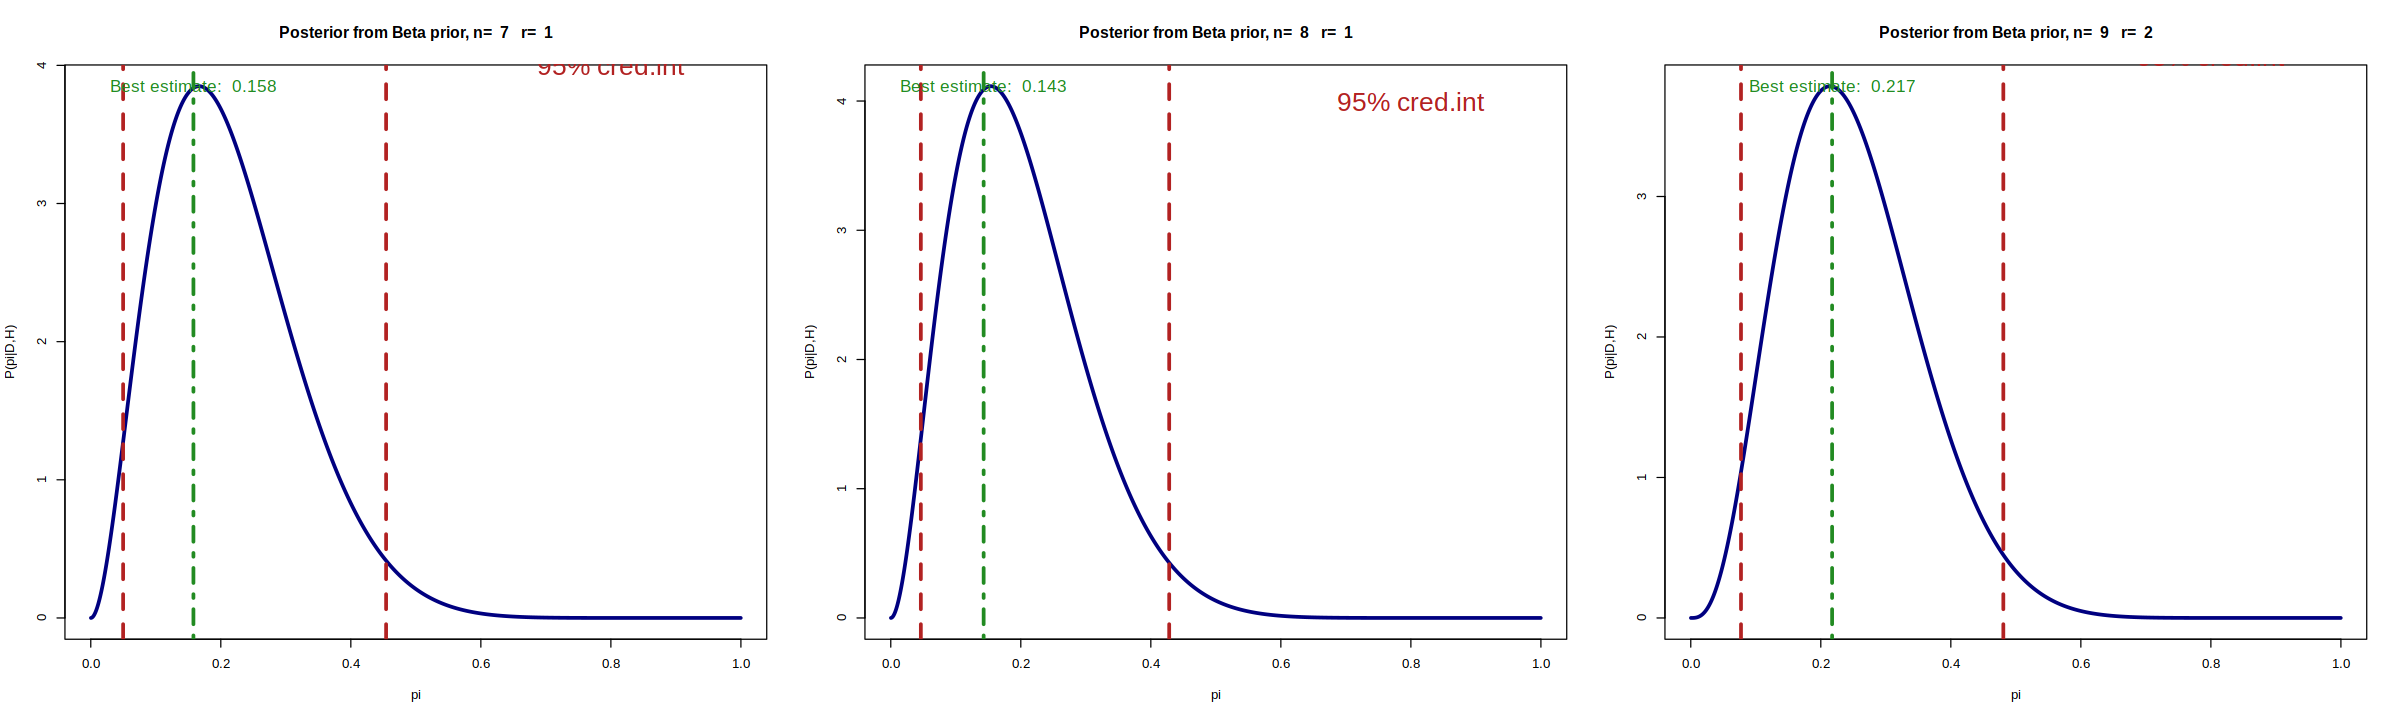

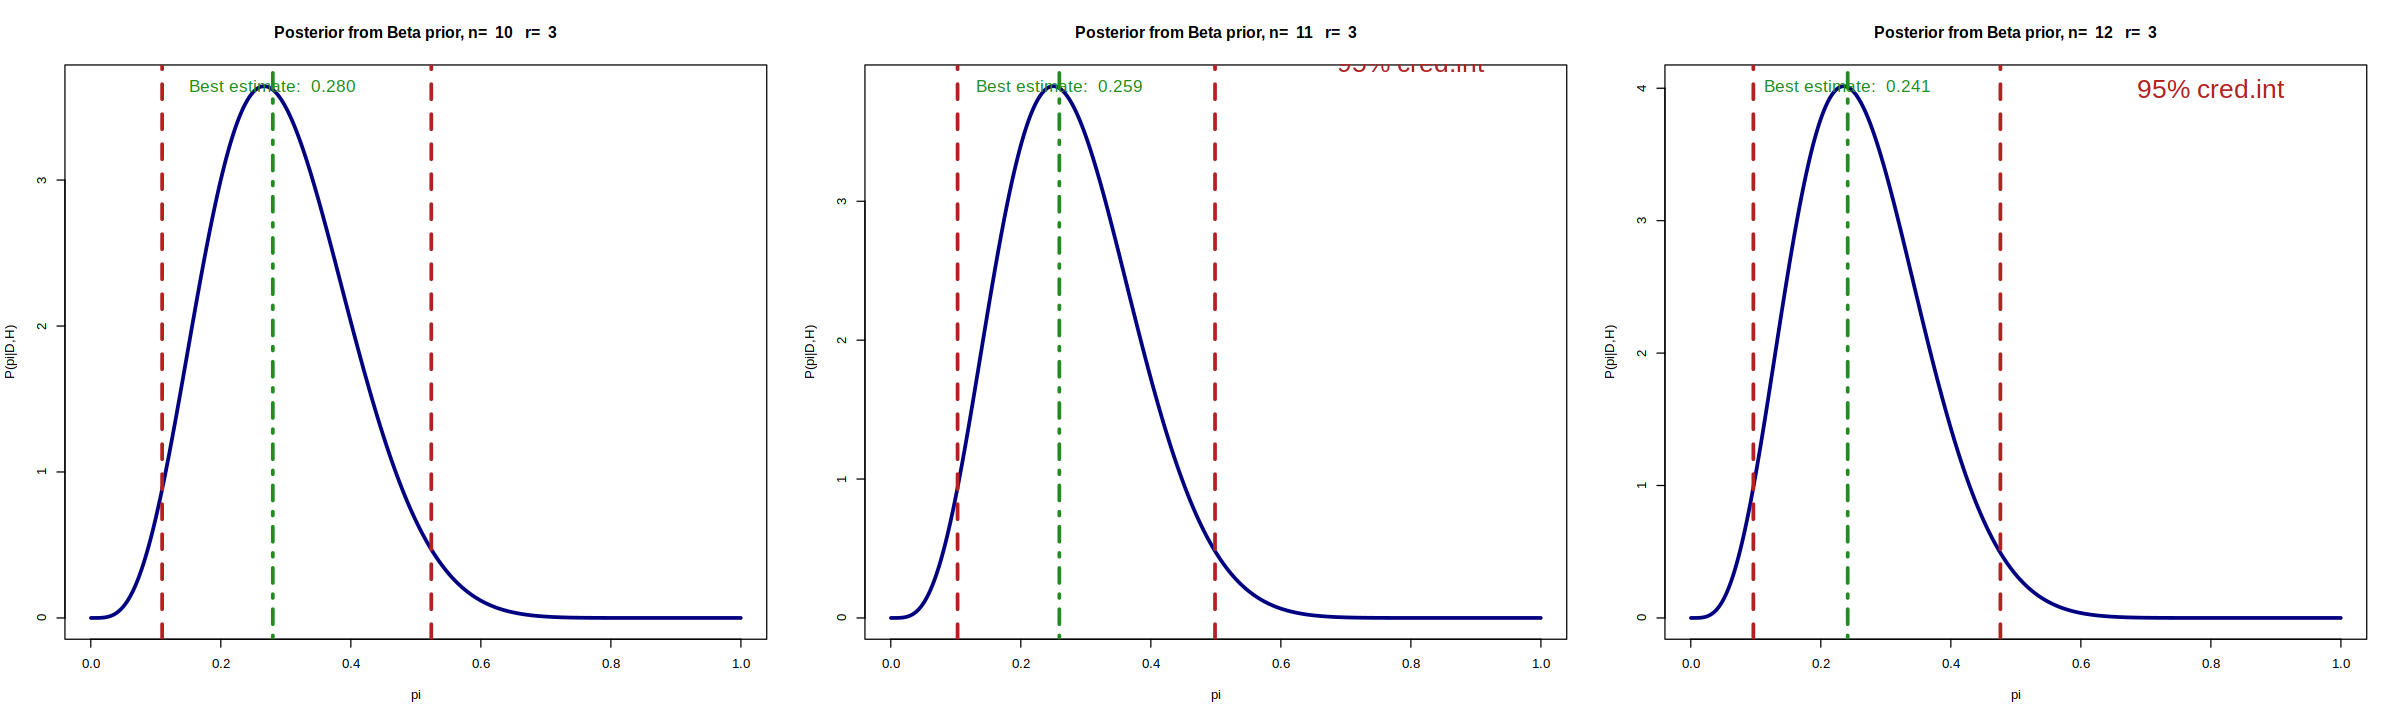

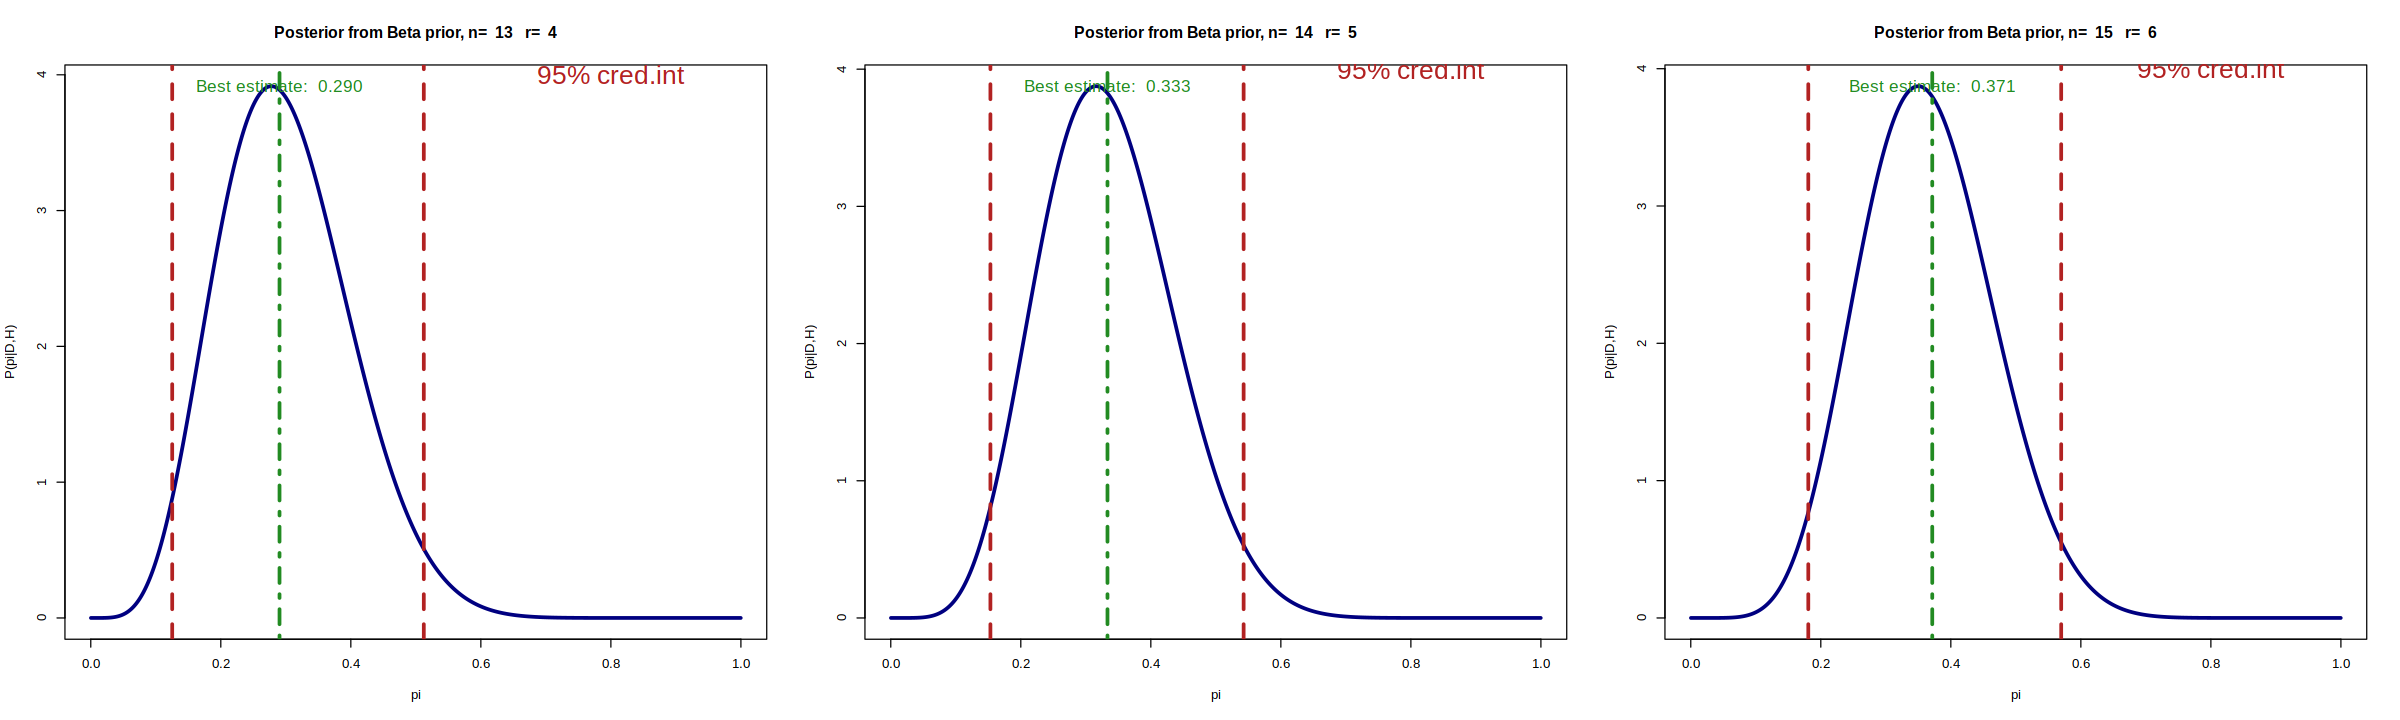

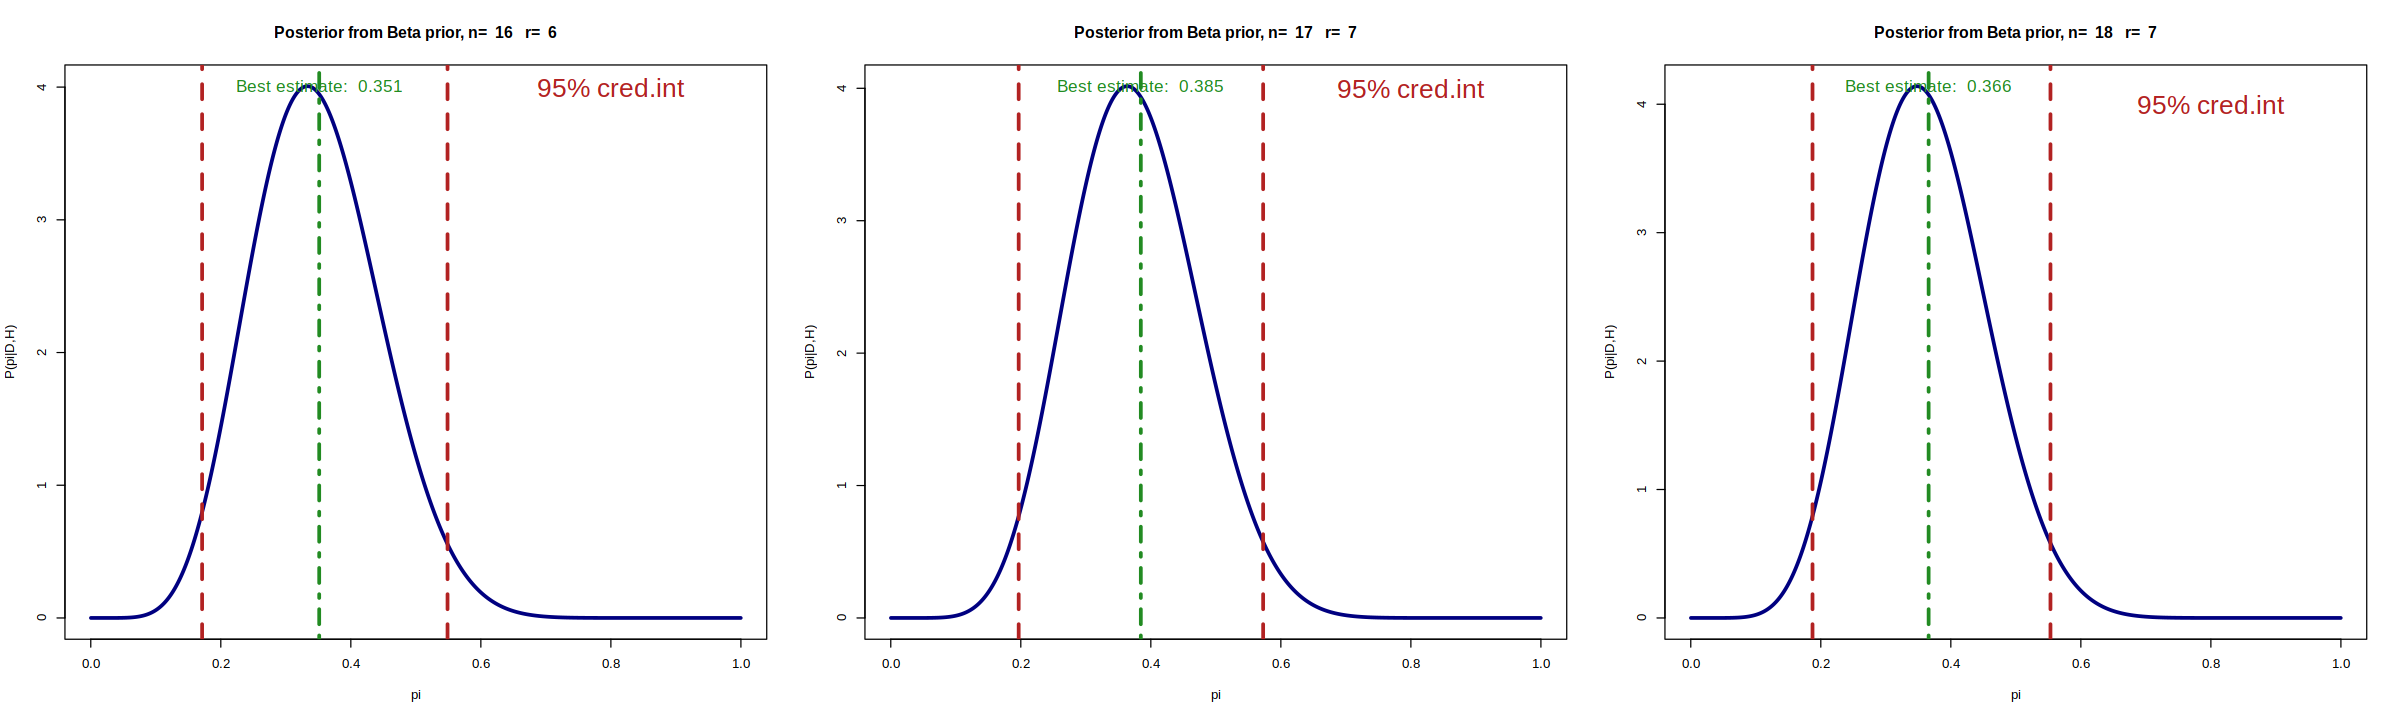

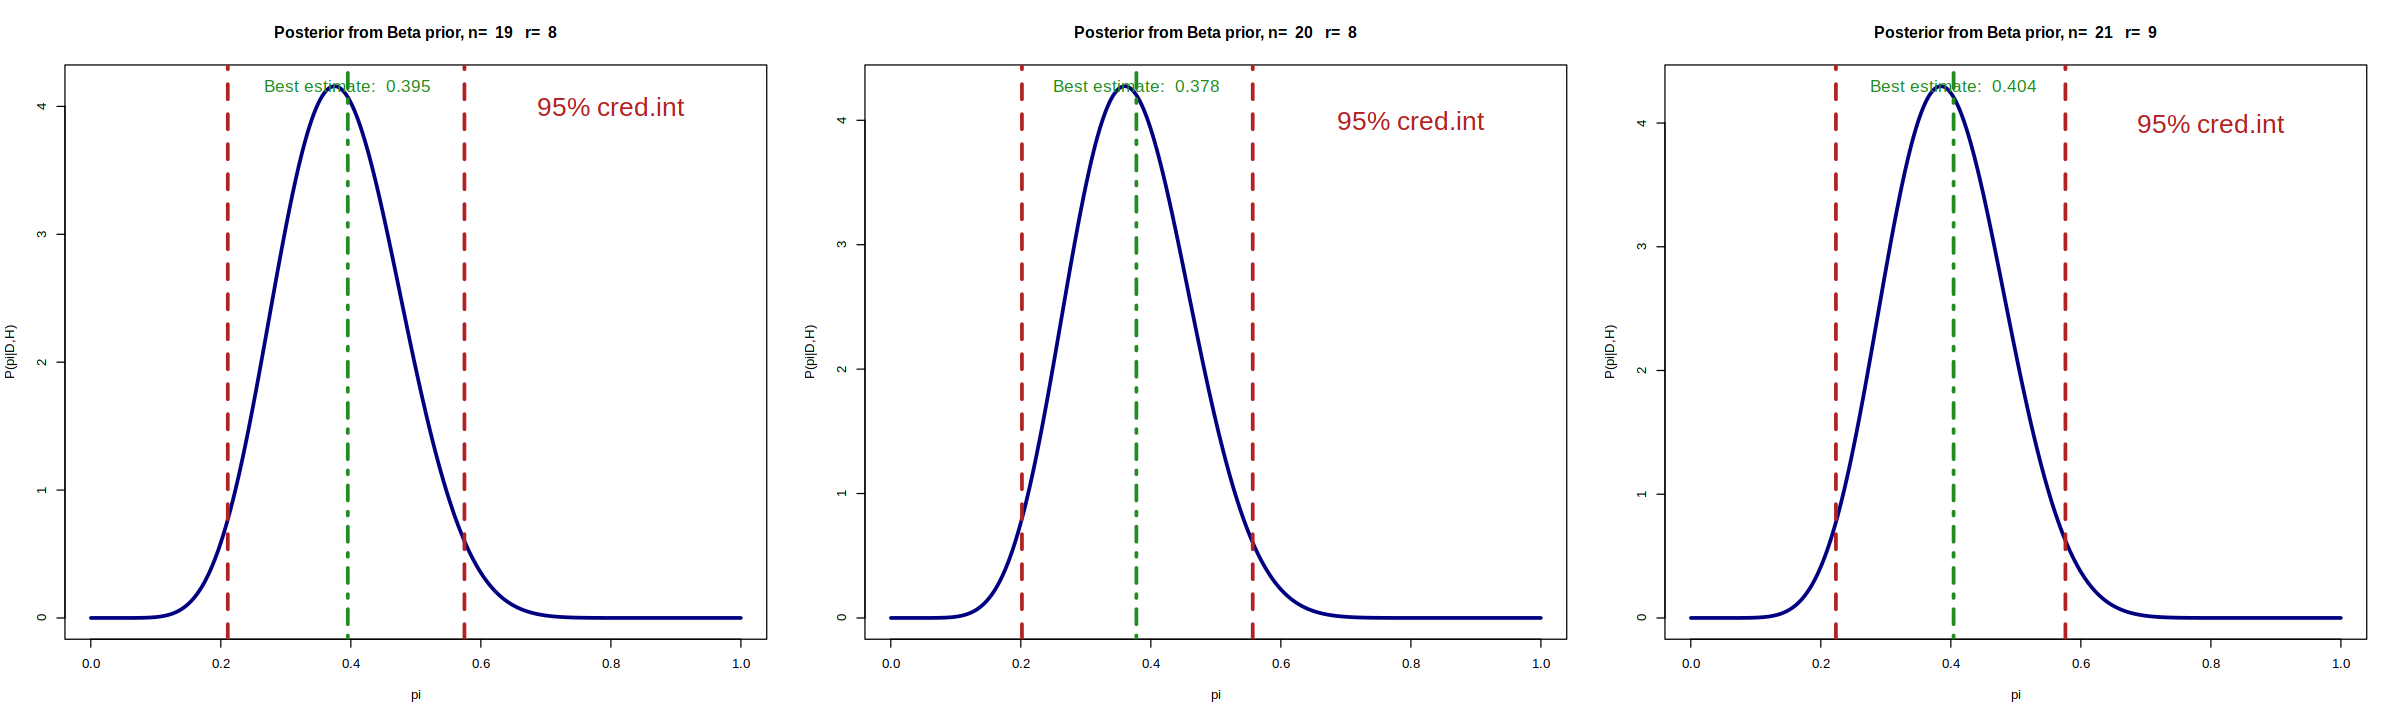

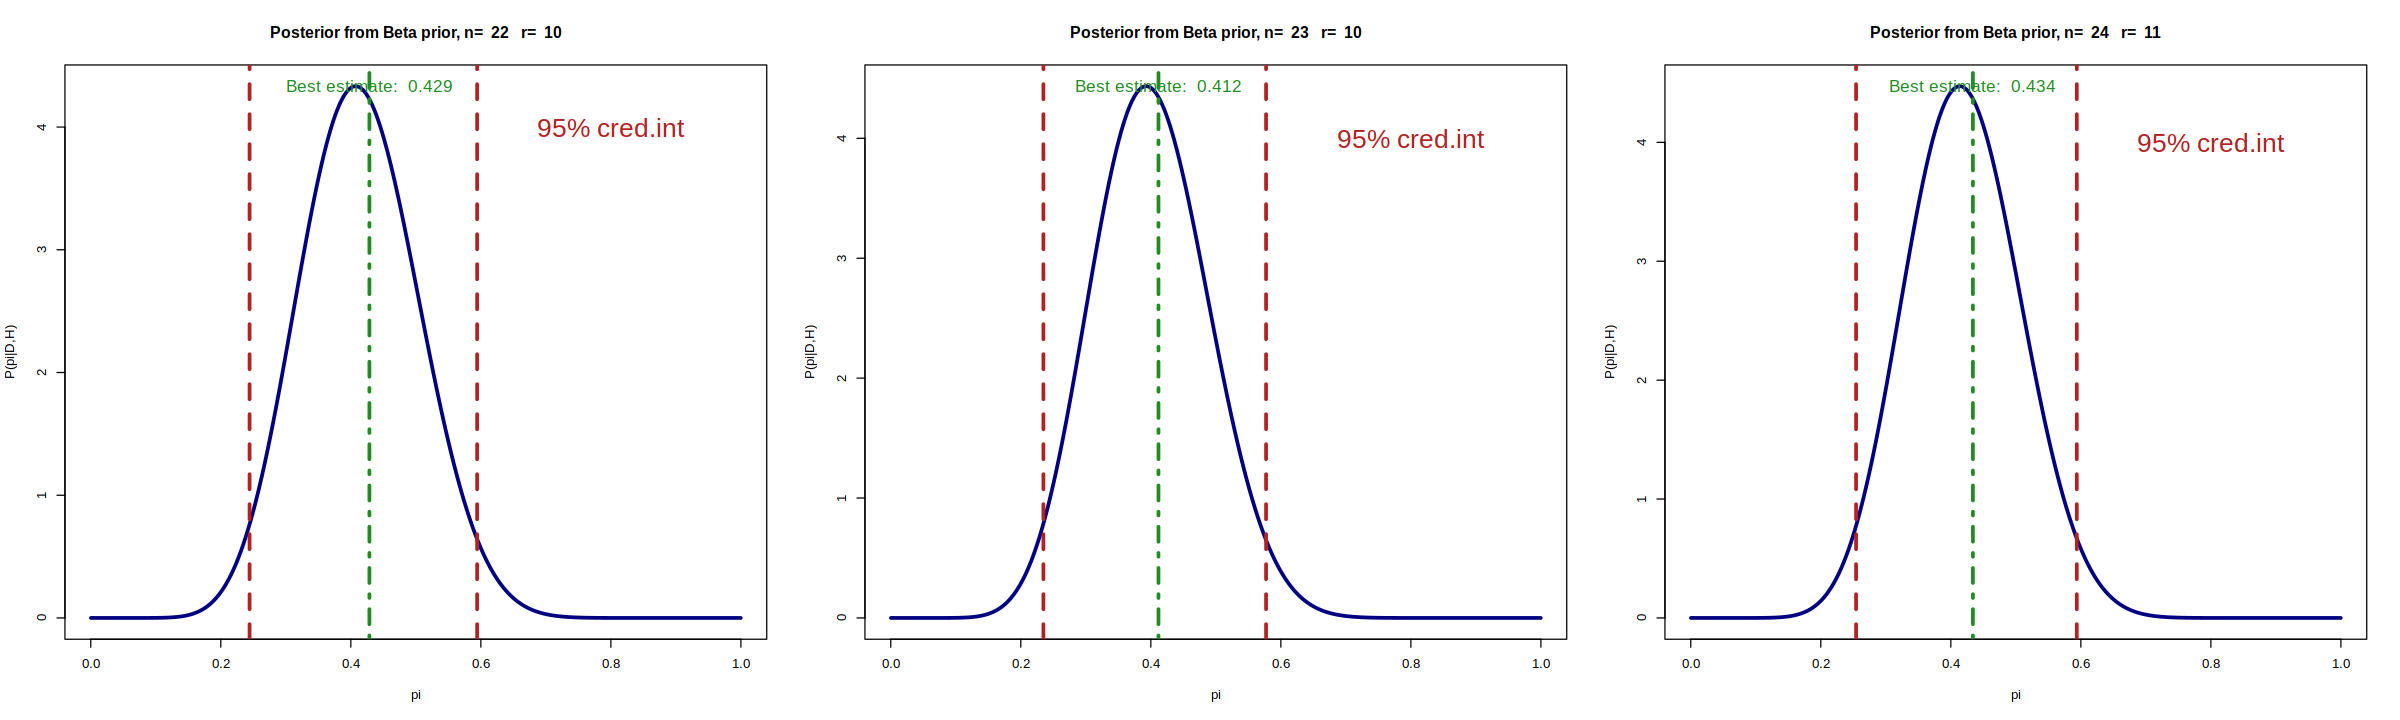

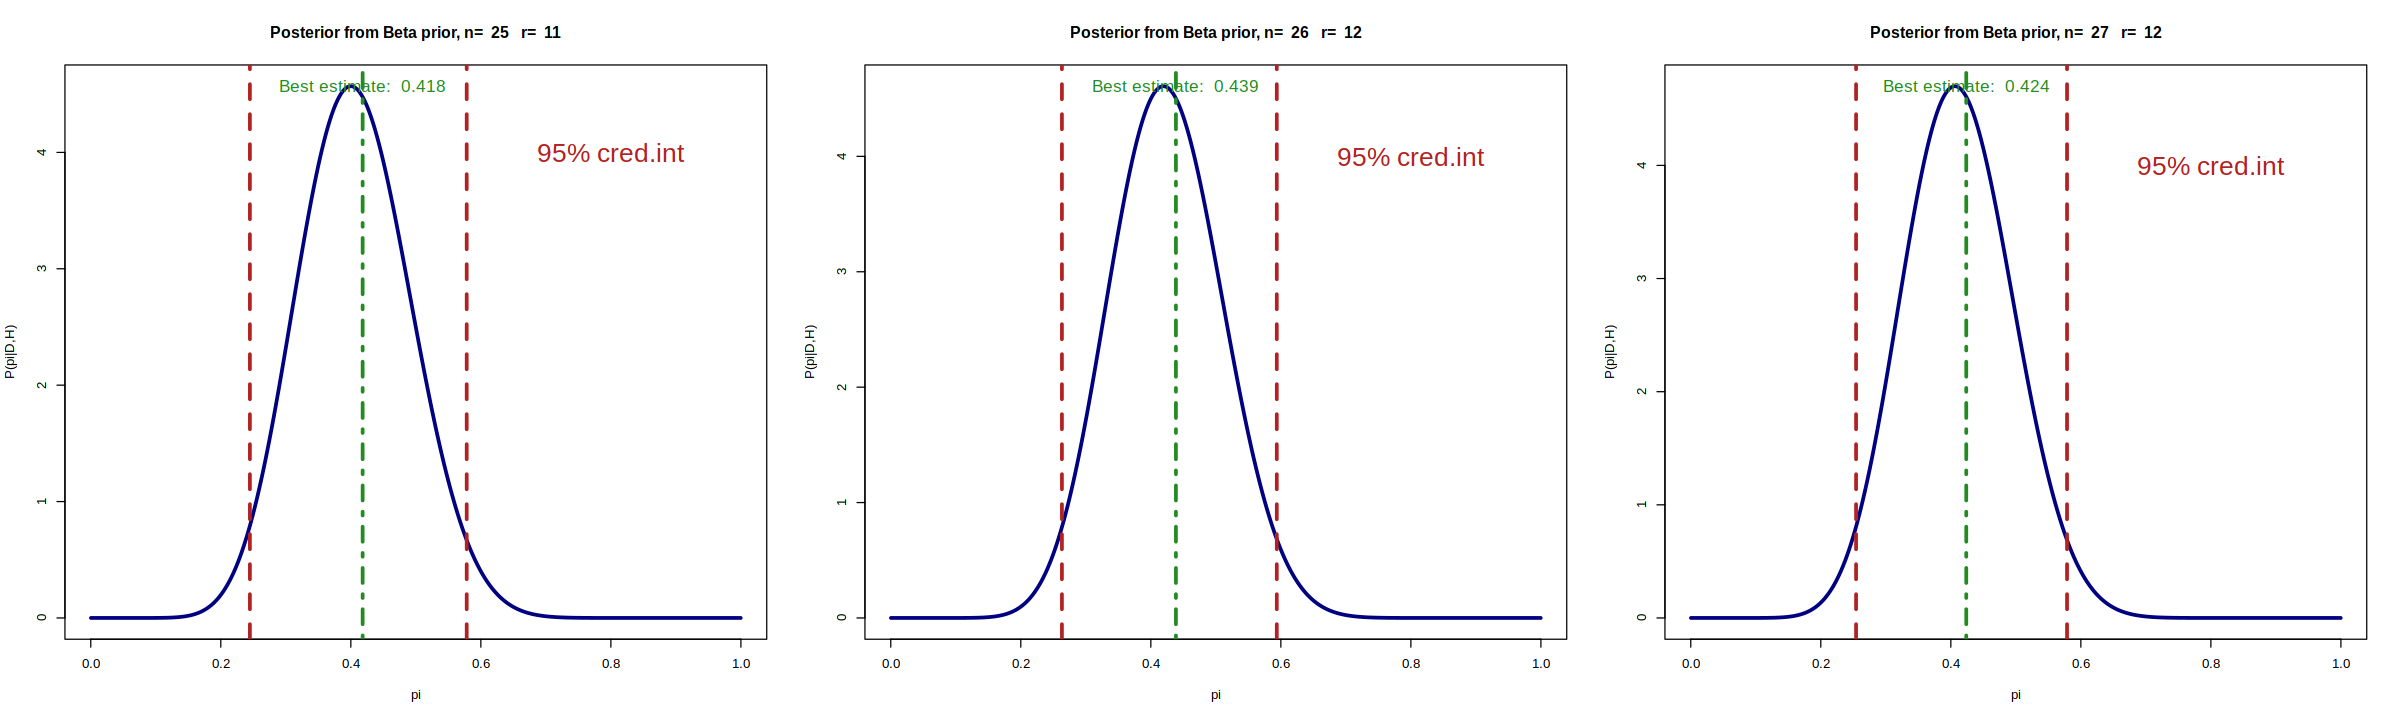

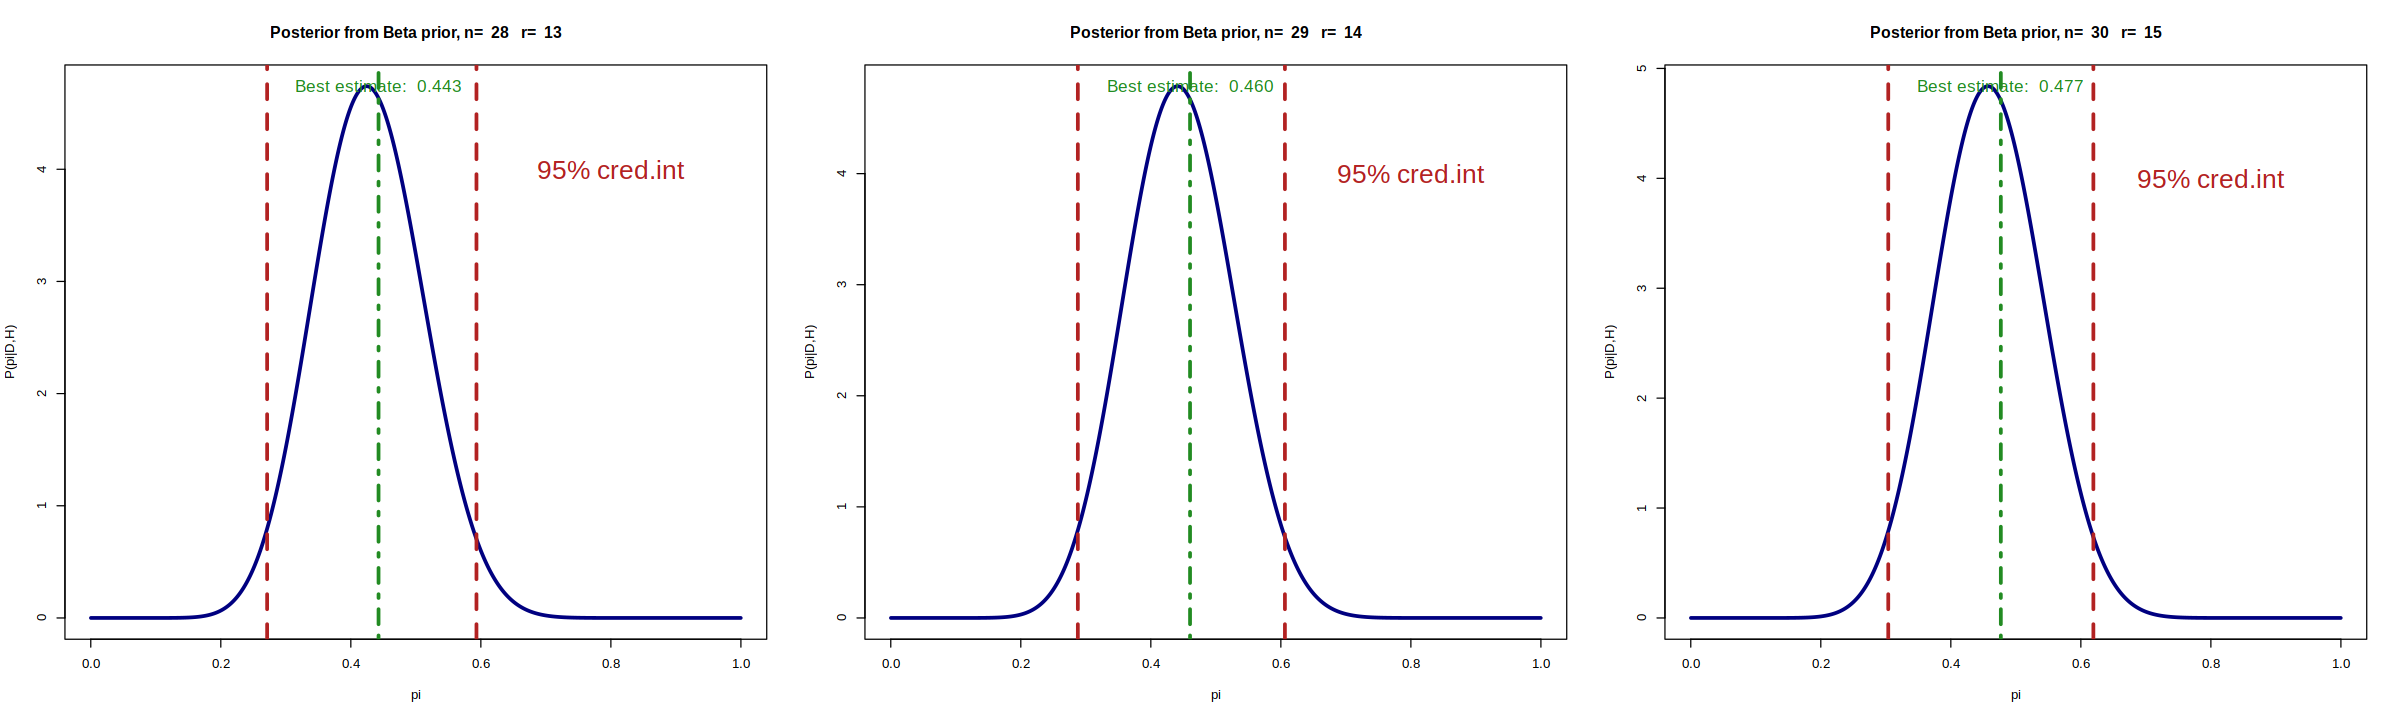

In [119]:
par(mfrow=c(1,3))
options(repr.plot.height=6, repr.plot.width=20)

for(i in seq(1,n.tot,by=1)){
    n <- i
    r <- sum(r.seq[1:i])
    
    #prior
    b.prior <- dbeta(p, alpha, beta)

    #Posterior (ALREADY NORMALIZED!)
    alphap <- alpha +r
    betap <- n-r + beta
    b.norm <- dbeta(p, alphap, betap)
    
    #best estimate and credibility
    theta.b <- (r+alphap-1)/(n+alphap+betap-2)  
    cred_beta <- cumsum(b.norm)/sum(b.norm)
    b.cred <- c()
    b.cred[1] <- max(p[cred_beta<=0.025])
    b.cred[2] <- min(p[cred_beta>=0.975])
    
    
    plot(p, b.norm, type='l', lwd=3, lty=1, col='navy', xlab='pi', ylab='P(pi|D,H)')
    title(main=paste('Posterior from Beta prior, n= ',n,'  r= ',r))
    abline(v=b.cred[1],lty=2,lwd=3,col='firebrick')
    abline(v=b.cred[2],lty=2,lwd=3,col='firebrick')
    abline(v=theta.b,lty=4,lwd=3,col='forestgreen')
    text(0.8,4, paste('95% cred.int'),col='firebrick', cex=2)
    text(theta.b,max(b.norm), paste('Best estimate: ', format(round(theta.b,3),nsmall=3)),col='forestgreen', cex=1.3)
}

# Exercise 4 - Six Boxes Toy Model : inference
• Labeling the boxes as follows: $H_j$ where $j$ is the number of white stones
• write a program in R that performs a simulation of the process
1) after selecting a random box
2) make random sampling from the box
3) prins on the standard output the probability of selecting each box
4) plot the probability for each box as a function of the number of trial

In [7]:
set.seed(1289)

hj <- seq(0,5) #index of boxes
N <- 40

#random choice of the box
r <- runif(1)
if (r <= 1/6) {j<-0}         #H_0
if(r>1/6 & r<=2/6) {j <- 1}  #H_1
if(r>2/6 & r<=3/6) {j <- 2}  #H_2
if(r>3/6 & r<=4/6) {j <- 3}  #H_3
if(r>4/6 & r<=5/6) {j <- 4}  #H_4
if(r>5/6 & r<=1) {j <- 5}    #H_5

#matrix to keep track of extractions
p <- matrix(, nrow=6, ncol=N+1)
E <- c()

#initial probabilities: equal for all
E[1] <- '-'
p[,1] <- 1/6

0  : -  0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 


In [27]:
p.ew <- function(j) {j/5}
p.eb <- function(j) {(5-j)/5}


cat('0  : ')
cat('-  ')
cat(p[,1], '\n')

#start
for (i in seq(2,N+1)) {
    cat(i-1, '  : ')
    r <- runif(1)
    if(r<=p.ew(j)) {E[i] <- 'w'
                   for(box in hj){
                       p[box+1,i]<- p[box+1,i-1]*p.ew(box+1)
                   }}
    else {E[i] <- 'b'
          for(box in hj){
              #cat(p.eb(box),' ')
              p[box+1,i]<- p[box+1,i-1]*p.eb(box+1)
          }
        }
    #cat((p[,i]), '\n')
    p[,i] <- p[,i]/sum(p[,i])
    cat(E[i],' ',p[,i], '\n')

}

0  : -  0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 
1   : b   0.4444444 0.3333333 0.2222222 0.1111111 0 -0.1111111 
2   : b   0.516129 0.2903226 0.1290323 0.03225806 0 0.03225806 
3   : b   0.6464646 0.2727273 0.08080808 0.01010101 0 -0.01010101 
4   : b   0.7211268 0.228169 0.04507042 0.002816901 0 0.002816901 
5   : b   0.7882987 0.187067 0.02463433 0.0007698229 0 -0.0007698229 
6   : b   0.8374566 0.1490493 0.01308526 0.0002044572 0 0.0002044572 
7   : b   0.8761966 0.1169581 0.006845286 5.34788e-05 0 -5.34788e-05 
8   : b   0.9057563 0.09067791 0.003538111 1.382074e-05 0 1.382074e-05 
9   : b   0.9284725 0.06971407 0.001813423 3.541842e-06 0 -3.541842e-06 
10   : b   0.9458125 0.05326203 0.000923645 9.019971e-07 0 9.019971e-07 
11   : b   0.9590271 0.04050464 0.0004682749 2.286499e-07 0 -2.286499e-07 
12   : b   0.9690668 0.0306965 0.0002365886 5.776088e-08 0 5.776088e-08 
13   : b   0.9766776 0.02320319 0.0001192233 1.455363e-08 0 -1.455363e-08 
14   : b   0.98243

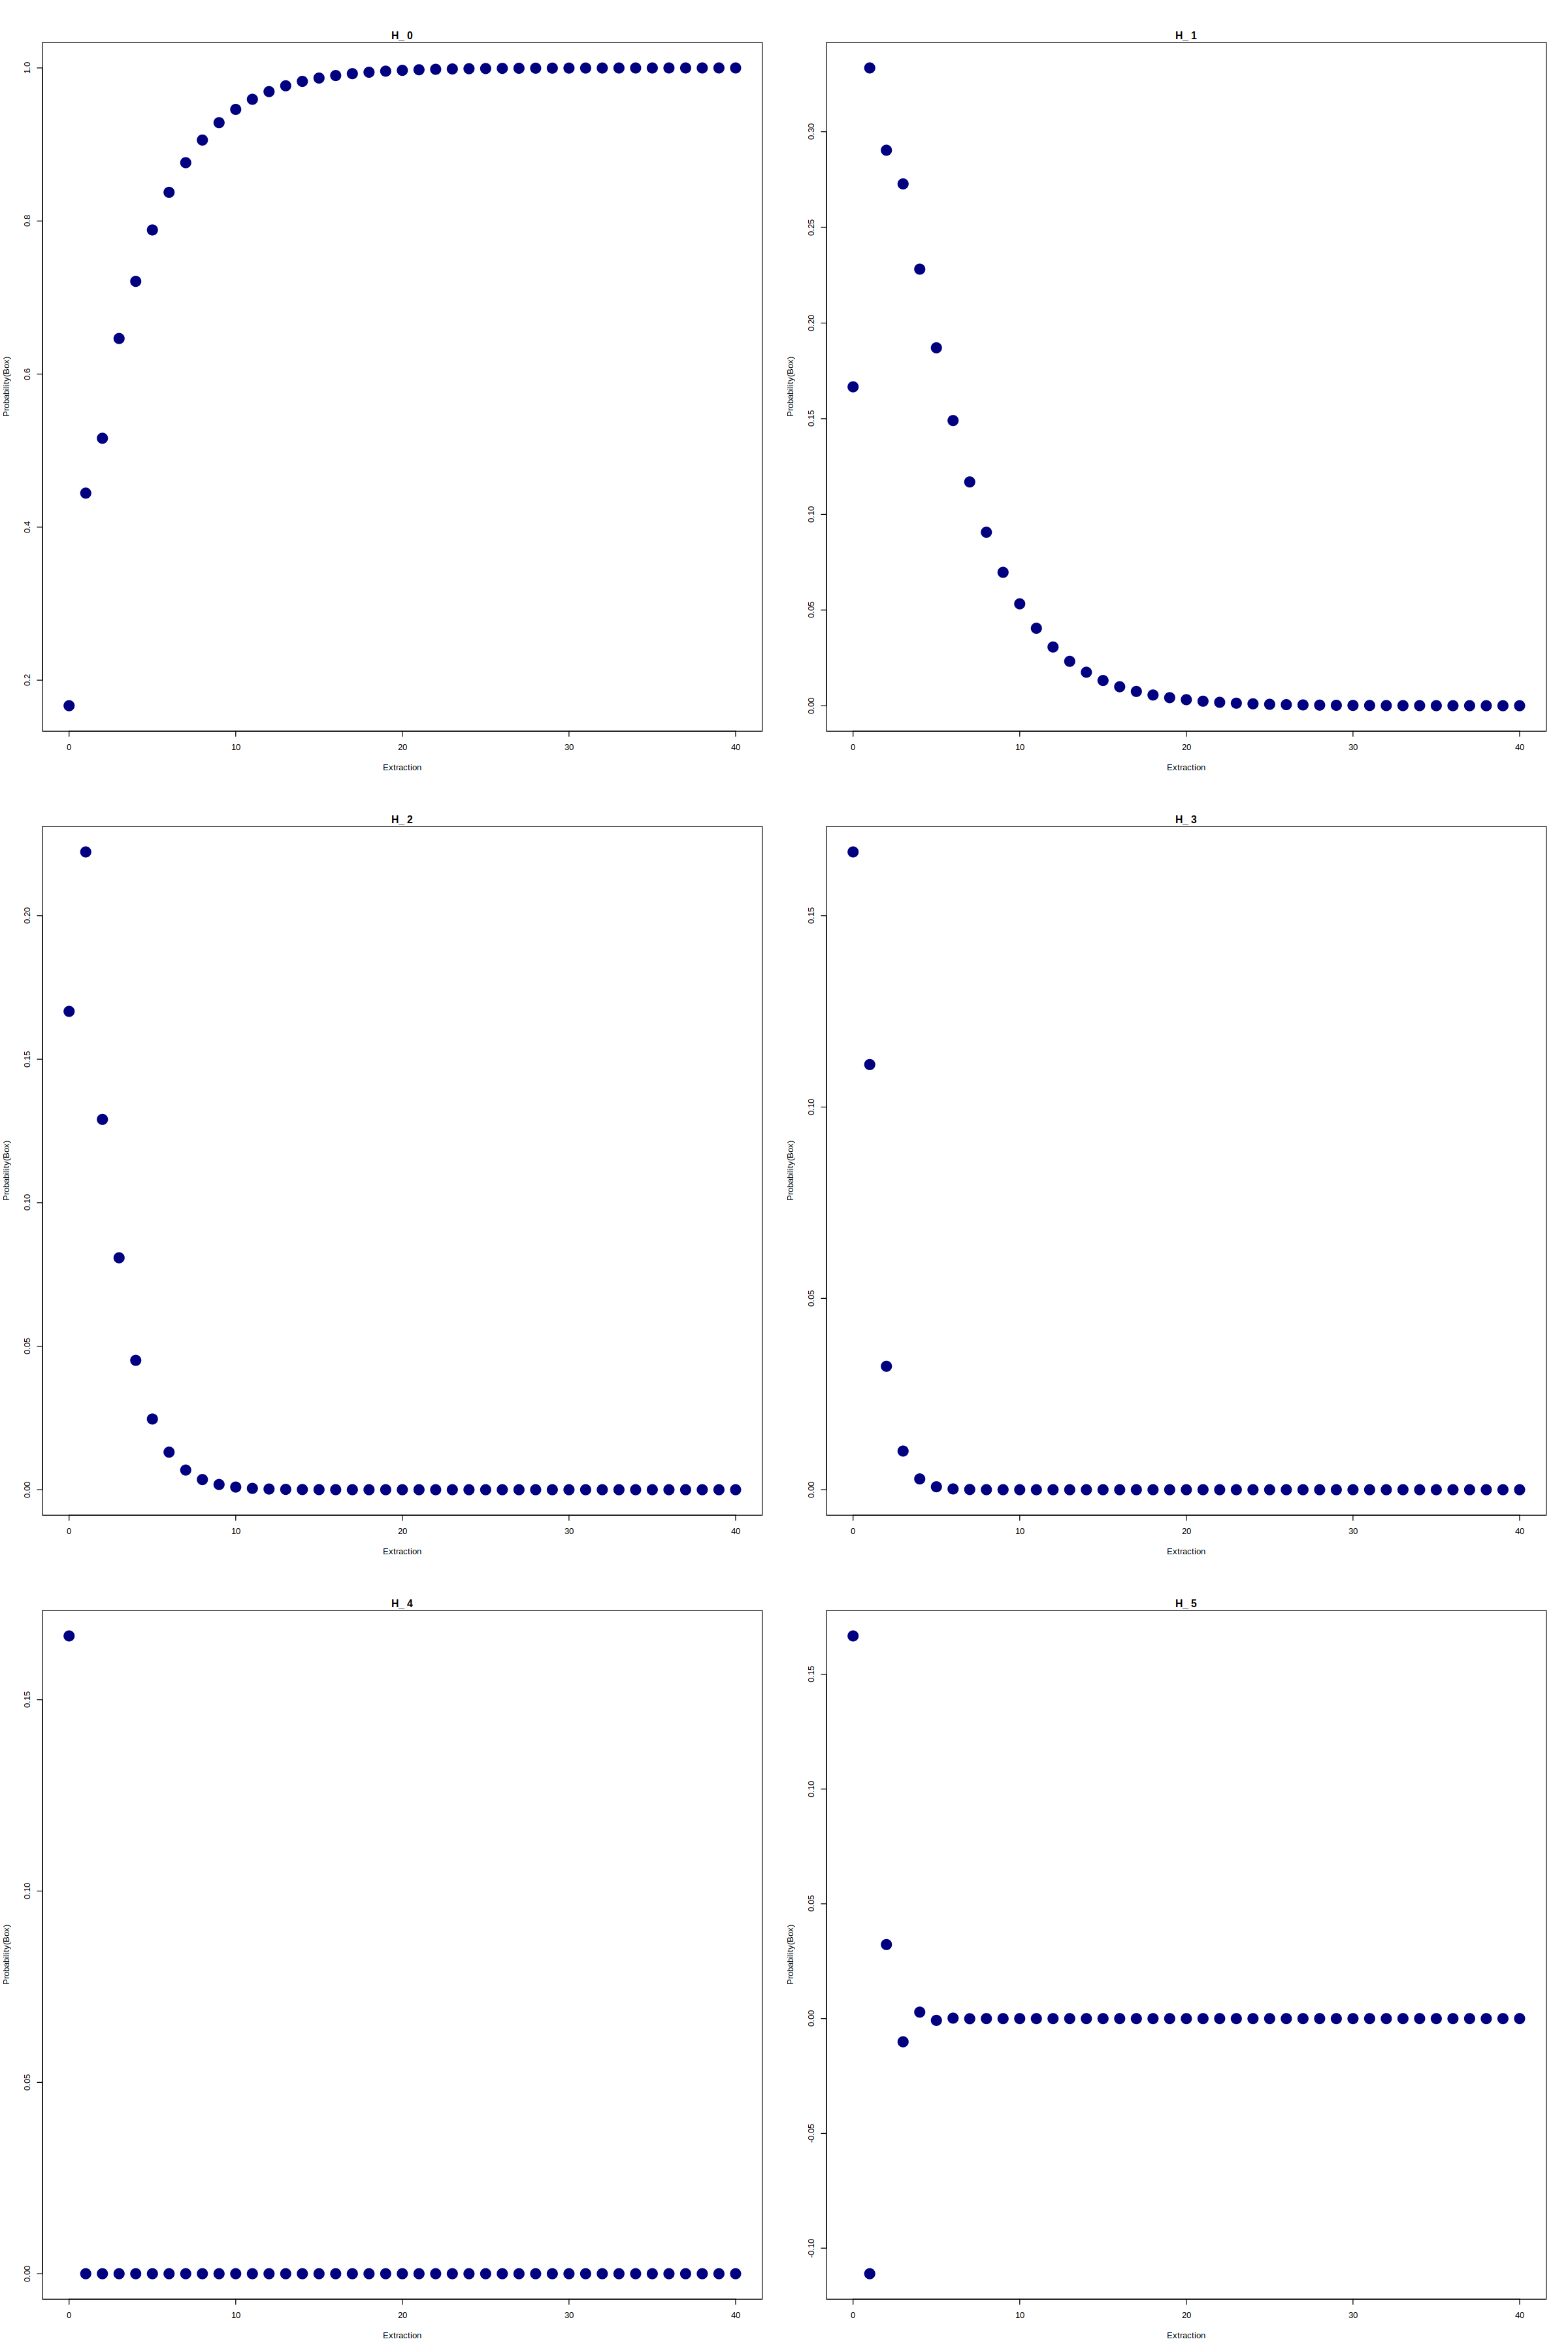

In [33]:
x <- seq(0,N,1)


plot_f <- function(j) {
    plot(x,p[j+1,], col='navy', cex=4, pch=20, xlab="Extraction", ylab="Probability(Box)") 
    title (main=paste("H_",j), line=0.3, cex.main=1.2)
}

options(repr.plot.width=20, repr.plot.height=30)
par(mfrow=c(3,2))
for (j in seq(0,5,1)) {plot_f(j)}
    